## Introductory cell of this Notebook

In this cell of the Notebook:

✅ What is the best neural network for generating synthetic data based on a dataframe of actual data? <br/>
✅ What are GANs exactly? <br/>
✅ How to train them? <br/>
✅ How to use them? <br/>
✅ Neural Network Zoo depicting GANs and other Neural Networks <br/>



---

### What is the best neural network for generating synthetic data based on a dataframe of actual data??

Ah, the quest for the best synthetic data generator! That's a fascinating area. While there isn't one single "best" neural network that reigns supreme for all dataframe types, certain architectures and approaches tend to perform exceptionally well. The ideal choice often depends on the specific characteristics of your data, such as the data types (numerical, categorical, mixed), the complexity of relationships between features, and the desired level of fidelity in the synthetic data.

However, based on current trends and research, here are some of the most promising and widely used neural network architectures for generating synthetic tabular data:

1. Tabular Generative Adversarial Networks (Tabular GANs):

- How they work: GANs involve two neural networks: a Generator that creates synthetic data and a Discriminator that tries to distinguish between real and synthetic data. They are trained in an adversarial manner, pushing the Generator to produce increasingly realistic synthetic samples that can fool the Discriminator.   
- Strengths:
    - Captures complex, non-linear relationships: GANs excel at learning intricate dependencies within the data, making them suitable for complex datasets.   
    - Generates high-fidelity synthetic data: When trained effectively, Tabular GANs can produce synthetic data that closely mimics the statistical properties and distributions of the real data.   
    - Handles mixed data types: Various adaptations of Tabular GANs can effectively handle both numerical and categorical features.   
- Popular Architectures:
    - CTGAN (Conditional Tabular GAN): One of the most popular and effective Tabular GAN architectures. It uses a conditional generator and discriminator, along with techniques like mode-specific normalization and gradient penalty, to handle categorical features and complex distributions effectively.   
    - TVAE (Tabular Variational Autoencoder): While technically not a GAN, TVAE is often compared and used for similar purposes. It uses a variational autoencoder framework to learn the underlying distribution of the data and generate new samples. It can be more stable to train than GANs.   
    - MedGAN (Medical GAN): Specifically designed for generating realistic medical data, it incorporates techniques to handle the unique characteristics of healthcare datasets.

2. Variational Autoencoders (VAEs):

- How they work: VAEs are probabilistic generative models. They learn a latent representation (a lower-dimensional encoding) of the data and then sample from this latent space to generate new data points.   
- Strengths:
    - Stable training: Generally easier and more stable to train compared to GANs.
    - Smooth latent space: The continuous and smooth latent space allows for interpolation and exploration of the data distribution.
    - Good for capturing overall data distribution: VAEs are effective at learning the general shape and characteristics of the data.
- Limitations:
    - Can sometimes produce less sharp or realistic samples compared to GANs: The generated data might lack the fine-grained details that GANs can sometimes capture.

3. Autoregressive Models:

- How they work: These models predict each feature based on the previously generated features. They learn the sequential dependencies between the columns in your dataframe.
- Strengths:
    - Can capture sequential dependencies between features: Useful if there's a natural order or relationship between the columns.
    - Relatively straightforward to understand and implement.
- Limitations:
    - Might struggle with complex, non-sequential relationships: If the dependencies between features are highly intertwined and not easily represented sequentially, these models might not perform as well.
    - Generation can be slower: Generating each feature sequentially can be computationally intensive for large datasets with many features.

Which one should you choose?

- For complex datasets with mixed data types and intricate relationships: CTGAN is often a strong starting point due to its proven effectiveness. TVAE is a good alternative if training stability is a concern.
- For datasets where capturing the overall distribution and generating relatively smooth samples is sufficient: VAEs can be a good and more stable option.
- If there are clear sequential dependencies between the features: Autoregressive models might be worth exploring.

Key Considerations for Success:

- Data Preprocessing: The quality of your real data significantly impacts the synthetic data. Proper handling of missing values, outliers, and categorical encoding is crucial.
- Hyperparameter Tuning: Finding the right architecture and hyperparameters (e.g., learning rate, network size, number of training epochs) is essential for optimal performance.
- Evaluation Metrics: Carefully evaluate the quality of the synthetic data using appropriate metrics that assess statistical similarity, privacy preservation (if applicable), and the utility of the synthetic data for downstream tasks.   
- Computational Resources: Training complex neural networks like GANs can be computationally expensive and may require significant resources (GPU acceleration).   

**In summary, while CTGAN often stands out as a powerful and versatile option for generating synthetic tabular data, the "best" neural network ultimately depends on the nuances of your specific dataset and your goals. Experimenting with different architectures and carefully evaluating the results is highly recommended.**

---


### What are GANs and how they came to be?

GANs were originally proposed by Ian Goodfellow et al. in a seminal paper called [Generative Adversarial Nets](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf).

(`et al.` means `and others`)

---


#### GANs description for generating images

GANs are a `framework` where 2 models (usually `neural networks`), called `generator (G)` and `discriminator (D)`, play a `minimax game` against each other. The generator is trying to learn the `distribution of real data` and is the network which we're usually interested in. During the game the goal of the generator is to trick the discriminator into "thinking" that the images it generates is real. The goal of the discriminator, on the other hand, is to correctly discriminate between the generated (fake) images and real images coming from some dataset (e.g. MNIST). 

At the equilibrium of the game the generator learns to generate images indistinguishable from the real images and the best that discriminator can do is output 0.5 - meaning it's 50% sure that what you gave him is a real image (and 50% sure that it's fake) - i.e. it doesn't have a clue of what's happening!

Potentially confusing parts: <br/><br/>
`minimax game` - basically they have some goal (objective function) and one is trying to minimize it, the other to maximize it, that's it. <br/><br/>
`distribution of real data` - basically you can think of any data you use as a point in the `n-dimensional` space. For example, MNIST 28x28 image when flattened has 784 numbers. So 1 image is simply a point in the 784-dimensional space. That's it. when I say `n` in order to visualize it just think of `3` or `2` dimensions - that's how everybody does it. So you can think of your data as a 3D/2D cloud of points. Each point has some probability associated with it - how likely is it to appear - that's the `distribution` part. So if your model has internal representation of this 3D/2D point cloud there is nothing stopping it from generating more points from that cloud! And those are new images (be it human faces, digits or whatever) that never existed!

<img src="images/data_distribution.PNG" alt="example of a simple 2D data distribution" align="center" style="width: 550px;"/> <br/>

Here is an example of a simple data distribution. The data here is 2-dimensional and the height of the plot is the probability of certain datapoint appearing. You can see that points around (0, 0) have the highest probability of happening. Those datapoints could be your 784-dimensional images projected into 2-dimensional space via PCA, t-SNE, UMAP, etc. (you don't need to know what these are, they are just some dimensionality reduction methods out there).

In reality this plot would have multiple peaks (`multi-modal`) and wouldn't be this nice.


#### The Neural Network Zoo --- Depicting GANs and other Neural Networks

The Neural Network Zoo: https://www.asimovinstitute.org/neural-network-zoo/
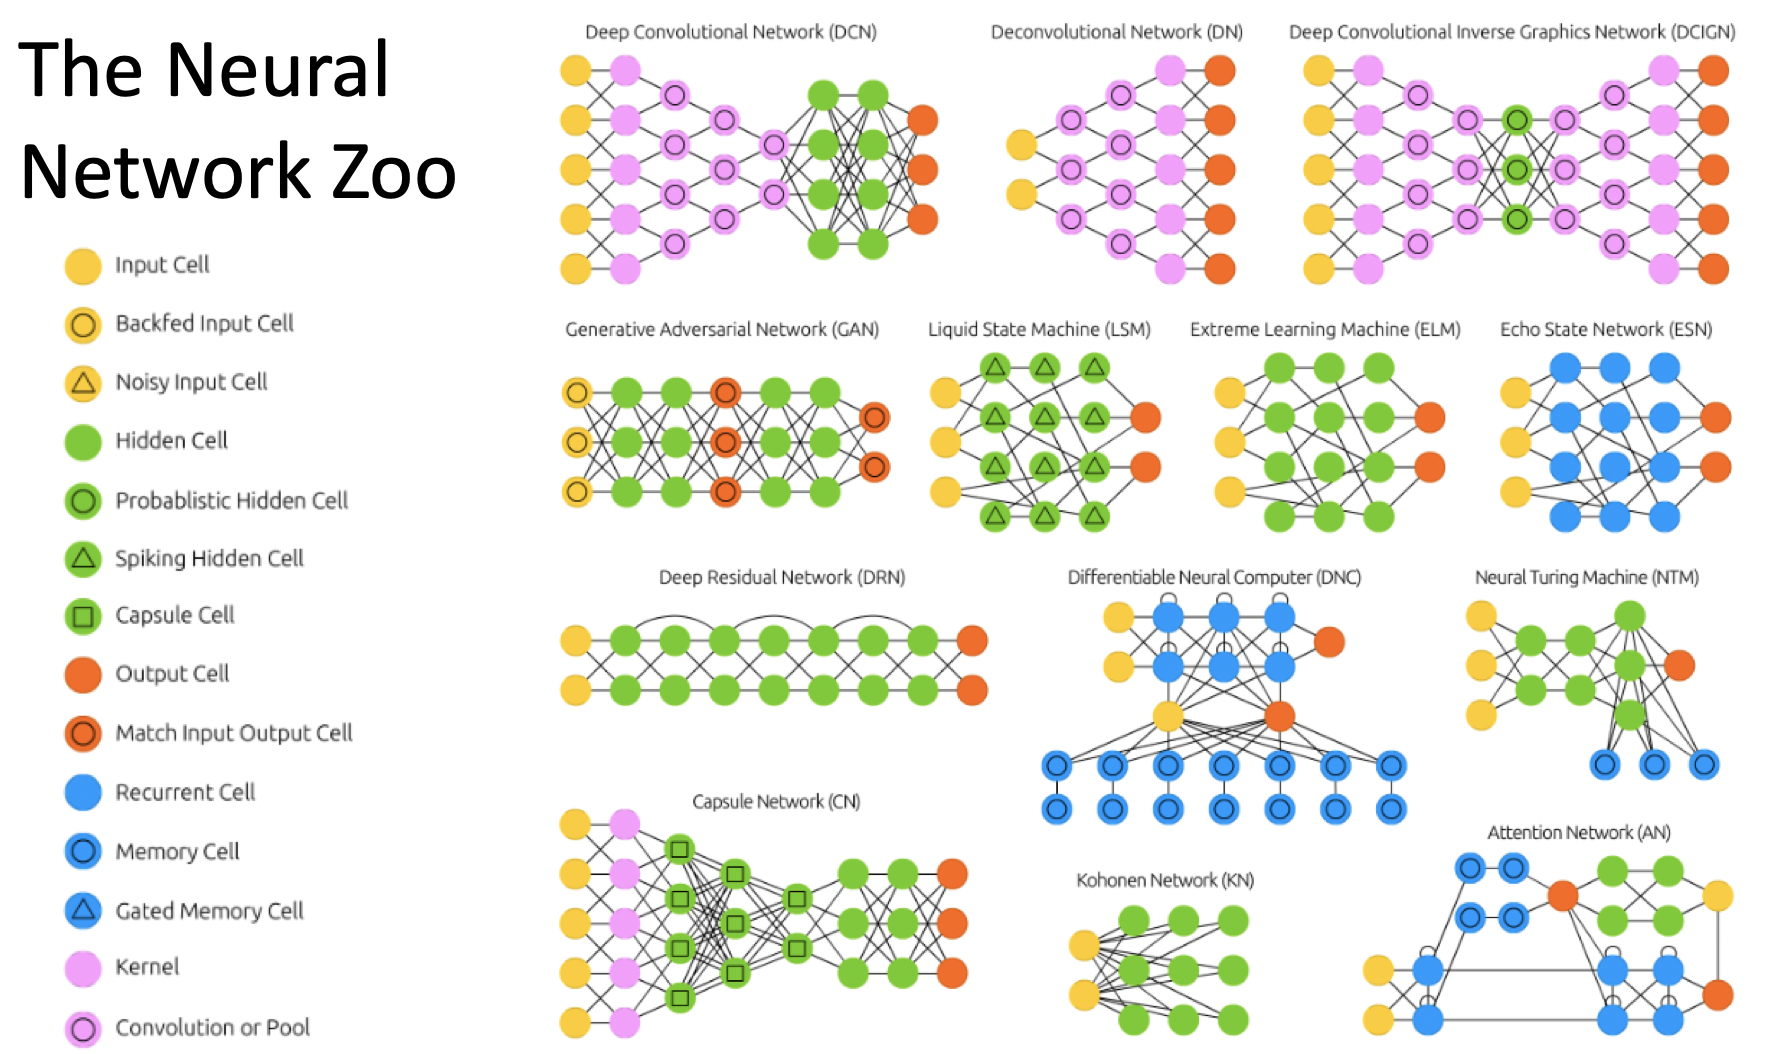

---


## Determining Anaconda environment

In [5]:
! jupyter kernelspec list

Available kernels:
  python3    /Users/maliksaunders/opt/anaconda3/share/jupyter/kernels/python3


In [6]:
import sys
print(sys.prefix)

/Users/maliksaunders/opt/anaconda3


In [7]:
! pwd

/Users/maliksaunders/Documents/GitHub_Repos/Synthetic_data_generation_of_personality_predictors


## Installing Python packages

In [14]:
# ! pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.3.1
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.2.1
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backp

In [15]:
# ! conda list

# packages in environment at /Users/maliksaunders/opt/anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2022.10                  py39_2  
_ipyw_jlab_nb_ext_conf    0.1.0            py39hecd8cb5_1  
aiohttp                   3.8.1            py39hca72f7f_1  
aiosignal                 1.2.0              pyhd3eb1b0_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  custom                   py39_3  
anaconda-client           1.9.0            py39hecd8cb5_0  
anaconda-navigator        2.3.1            py39hecd8cb5_0  
anaconda-project          0.10.2             pyhd3eb1b0_0  
anyio                     3.5.0            py39hecd8cb5_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
applaunchservices         0.2.1              pyhd3eb1b0_0  
appnope                   0.1.2           py39hecd8cb5_1001  
appscript                 1.1.2            py39h9ed2024_0  
argon2-cffi             

In [3]:
# conda install pytorch torchvision -c pytorch

In [4]:
# conda list

### Installs for 'sdv' and 'ctgan'

In [16]:
# ! pip install sdv

In [17]:
# ! conda install sdv

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - sdv

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [20]:
# ! conda install -c conda-forge sdv

done
Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-64::scikit-learn==1.0.2=py39hae1ba45_1
  - defaults/noarch::arrow==1.2.2=pyhd3eb1b0_0
  - defaults/noarch::holoviews==1.14.8=pyhd3eb1b0_0
  - defaults/osx-64::bottleneck==1.3.4=py39h67323c0_0
  - defaults/osx-64::anaconda==custom=py39_3
  - defaults/osx-64::notebook==6.4.8=py39hecd8cb5_0
  - defaults/noarch::imageio==2.9.0=pyhd3eb1b0_0
  - defaults/noarch::smart_open==5.1.0=pyhd3eb1b0_0
  - defaults/osx-64::conda-build==3.26.1=py39hecd8cb5_0
  - defaults/noarch::nbclassic==0.3.5=pyhd3eb1b0_0
  - defaults/osx-64::jupyter==1.0.0=py39hecd8cb5_7
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/osx-64::scikit-image==0.19.2=py39hae1ba45_0
  - defaults/noarch::python-lsp-black==1.0.0=pyhd3eb1b0_0
  - defaults/noarch::argon2-cffi==21.3.0=pyhd3eb1b0_0
  

In [18]:
# pip install ctgan sdv

     |████████████████████████████████| 157 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 15.4 MB/s eta 0:00:01
     |████████████████████████████████| 13.5 MB 18.1 MB/s eta 0:00:01
     |████████████████████████████████| 139 kB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 21.2 MB 174.9 MB/s eta 0:00:01
     |████████████████████████████████| 184 kB 203.2 MB/s eta 0:00:01
     |████████████████████████████████| 193 kB 203.6 MB/s eta 0:00:01
     |████████████████████████████████| 52 kB 12.2 MB/s  eta 0:00:01
     |████████████████████████████████| 47 kB 37.7 MB/s  eta 0:00:01
     |████████████████████████████████| 84 kB 32.8 MB/s  eta 0:00:01
     |████████████████████████████████| 14.8 MB 56.7 MB/s eta 0:00:01
     |████████████████████████████████| 325 kB 75.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 73.2 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 184.1 MB/s eta 0:00:01
     |███████████████████████

In [8]:
! pip show ctgan

Name: ctgan
Version: 0.11.0
Summary: Create tabular synthetic data using a conditional GAN
Home-page: 
Author: 
Author-email: "DataCebo, Inc." <info@sdv.dev>
License: BSL-1.1
Location: /Users/maliksaunders/opt/anaconda3/lib/python3.9/site-packages
Requires: rdt, torch, numpy, tqdm, pandas
Required-by: sdv


In [11]:
! conda list ctgan

# packages in environment at /Users/maliksaunders/opt/anaconda3:
#
# Name                    Version                   Build  Channel
ctgan                     0.11.0                   pypi_0    pypi


In [3]:
# pip install sdv

Note: you may need to restart the kernel to use updated packages.


In [9]:
! pip show sdv

Name: sdv
Version: 1.20.0
Summary: Generate synthetic data for single table, multi table and sequential data
Home-page: 
Author: 
Author-email: "DataCebo, Inc." <info@sdv.dev>
License: BSL-1.1
Location: /Users/maliksaunders/opt/anaconda3/lib/python3.9/site-packages
Requires: botocore, sdmetrics, pandas, ctgan, deepecho, rdt, pyyaml, cloudpickle, copulas, platformdirs, boto3, numpy, tqdm, graphviz
Required-by: 


In [10]:
! conda list sdv

# packages in environment at /Users/maliksaunders/opt/anaconda3:
#
# Name                    Version                   Build  Channel
sdv                       1.20.0                   pypi_0    pypi


In [2]:
conda install -c conda-forge sdv

done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda


failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


### List all Conda Environments already in existence

In [1]:
! conda env list

# conda environments:
#
base                  *  /Users/maliksaunders/opt/anaconda3
                         /opt/anaconda3



### Create and Activate Conda environment for 'sdv' ('sdv-env')

In [2]:
# ! conda create -n sdv-env python=3.10 -y


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/maliksaunders/opt/anaconda3/envs/sdv-env

  added / updated specs:
    - python=3.10


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bzip2-1.0.8                |       h6c40b1e_6         151 KB
    ca-certificates-2025.2.25  |       hecd8cb5_0         131 KB
    libffi-3.4.4               |       hecd8cb5_1         129 KB
    ncurses-6.4                |       hcec6c5f_0        1018 KB
    openssl-3.0.16             |       h184c1cd_0         4.6 MB
    pip-25.0                   |  py310hecd8cb5_0         2.3 MB
    python-3.10.16             |       hce00570_1        13.2 MB
    readline-8.2               |       hca72f7f_0    

In [3]:
! conda env list

# conda environments:
#
base                  *  /Users/maliksaunders/opt/anaconda3
sdv-env                  /Users/maliksaunders/opt/anaconda3/envs/sdv-env
                         /opt/anaconda3



In [4]:
! conda activate sdv-env


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [6]:
! pip install sdv

### Register Kernel with Jupyter

In [ ]:
# ! pip install ipykernel

#### Display available Jupyter Kernels

In [8]:
! jupyter kernelspec list

Available kernels:
  python3    /Users/maliksaunders/opt/anaconda3/share/jupyter/kernels/python3


In [9]:
# ! python -m ipykernel install --user --name=sdv-env --display-name "Python (SDV)"

Installed kernelspec sdv-env in /Users/maliksaunders/Library/Jupyter/kernels/sdv-env


In [10]:
! jupyter kernelspec list

Available kernels:
  sdv-env    /Users/maliksaunders/Library/Jupyter/kernels/sdv-env
  python3    /Users/maliksaunders/opt/anaconda3/share/jupyter/kernels/python3


### Install sdv within my Conda environment (e.g., 'sdv-env')

In [13]:
! conda activate sdv-env
! pip install sdv


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




### Test if sdv.tabular can now be imported

In [1]:
from sdv.tabular import CTGAN

ModuleNotFoundError: No module named 'sdv.tabular'

## Import Needed Libraries

### ML libraries to consider

- scikit-learn
- Apache Spark ML (MLlib)
- XGBoost
- TensorFlow
- PyTorch
---

In [4]:
# I always like to structure my imports into Python's native libs,
# stuff I installed via conda/pip and local file imports (we don't have those here)
import os
import re
import time
import enum


# import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# import git


import torch
from torch import nn
from torch.optim import Adam
from torchvision import transforms, datasets
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
# from torch.utils.tensorboard import SummaryWriter

import pandas as pd

In [4]:
#check for gpu
if torch.backends.mps.is_available():
   mps_device = torch.device("mps")
   x = torch.ones(1, device=mps_device)
   print (x)
else:
   print ("MPS device not found.")

tensor([1.], device='mps:0')


## Understand your data - Become One With Your Data!
### Understand the Personality Data which is related to the Big 5 (OCEAN) Personality Assessment

#### 5 Basic Traits of OCEAN

Researchers have found that there is a science to personality. Everyone, regardless of gender, age, or nationality, has five basic traits. (https://www.scienceofpeople.com/personality/)

(https://www.truity.com/blog/page/big-five-personality-traits)
The Big Five (also called Five Factor) trait model of personality is the most widely accepted personality theory in the scientific community. Although it is not as well understood among laypeople as systems like *Myers-Briggs personality typing*, it is generally believed to be the most scientifically sound way of conceptualizing the differences between people.

The Big Five is so named because the model proposes that human personality can be measured along five major dimensions, each of which is distinct and independent from the others. The Big Five model is also sometimes called OCEAN or CANOE, both acronyms of the five personality traits.

In the Big Five model, people are understood to have varying levels of key personality factors which drive our thoughts and behavior. Although personality traits cannot specifically predict behavior, differences in the Big Five factors help us to understand why people may react differently, behave differently, and see things differently from others in the same situation.

- **Openness**: Not to be confused with one's tendency to be open and disclose their thoughts and feelings, Openness in the context of the Big Five refers more specifically to Openness to Experience, or openness to considering new ideas. This trait has also been called "Intellect" by some researchers, but this terminology has been largely abandoned because it implies that people high in Openness are more intelligent, which is not necessarily true.
- **Conscientiousness**: Conscientiousness describes a person's level of goal orientation and persistence. Those who are high in Conscientiousness are organized and determined, and are able to forego immediate gratification for the sake of long-term achievement. Those who are low in this trait are impulsive and easily sidetracked.
- **Extroversion**:  Extraversion describes a person’s inclination to seek stimulation from the outside world, especially in the form of attention from other people. Extraverts engage actively with others to earn friendship, admiration, power, status, excitement, and romance. Introverts, on the other hand, conserve their energy, and do not work as hard to earn these social rewards.
- **Agreeableness**:  Agreeableness describes the extent to which a person prioritizes the needs of others over their own needs. People who are high in Agreeableness experience a great deal of empathy and tend to get pleasure out of serving and taking care of others. People who are low in Agreeableness tend to experience less empathy and put their own concerns ahead of others. 
- **Neuroticism**:  Neuroticism describes a person's tendency to respond to stressors with negative emotions, including fear, sadness, anxiety, guilt, and shame. This trait can be thought of as an alarm system. People experience negative emotions as a sign that something is wrong in the world. Fear is a response to danger, guilt a response to having done something wrong. However, not everyone has the same reaction to a given situation. High Neuroticism scorers are more likely to react to a situation with strong negative emotions. Low Neuroticism scorers are more likely to brush off their misfortune and move on.


## This data represents answers to personality tests

This data represents answers to personality tests, in which participants rated themselves on 50 statements.  Ratings were on a 5-point scale (1=Disagree, 3=Neutral, 5=Agree).

* Columns:
  * The 50 statements are represented in 50 coded columns; e.g., "EXT1" corresponds to "I am the life of the party."
  * There are also 50 columns with suffix "_E" representing the time spent on that question in milliseconds.
  * There are several columns with other metadata about the user: screen dimensions, other time measurements, country, and location coordinates.
* Rows: Each row corresponds to 1 user's survey submission.
* Target column: The target column `EST1` represents the person's response to "I get stressed out easily."  I.e., we are trying to predict whether someone thinks they get stressed easily, given their other personality traits.


### Most of the columns should have an integer datatype; a few of the columns have other datatypes.

### This is our target column which we want to learn to predict:

**Target column**: Your goal will be to predict the following `target` (label) column:

`target` = 'EST1'

---

## In light of this particular dataset, here are some key considerations from Gemini for what kind of GAN model to use:

Ah, a fascinating dataset for personality prediction! Given the details you've provided, here's how I'm thinking about generating synthetic data that captures the nuances of this kind of information:

**Understanding the Data Characteristics:**

* **Likert Scale Responses (1-5):** The 50 personality statements are rated on an ordinal scale. This discrete and bounded nature is important to preserve in synthetic data.
* **Time Spent per Question (\_E columns):** These features likely capture the level of deliberation or impulsiveness in responding. Their distributions and potential correlations with the personality ratings are valuable to model.
* **Metadata (Screen Dimensions, Time Measurements, Location):** This information might have subtle relationships with personality traits or response patterns.
* **Integer Datatypes (mostly):** This simplifies modeling compared to continuous numerical data, but the ordinal nature of the personality ratings needs attention.
* **Target Column ('EST1'):** While your primary goal is prediction, when generating synthetic data, we aim to reproduce the statistical properties of *all* columns, including the target. This allows for creating a full synthetic dataset that mirrors the original.

**Neural Network Approaches for This Data:**

Considering these characteristics, here's how the previously discussed neural network approaches might fare and which might be most suitable:

* **Tabular GANs (especially CTGAN):**
    * **Strengths:** CTGAN is particularly well-suited for handling mixed data types (integer ratings, potentially other numerical metadata, and categorical metadata like country). Its ability to learn complex, non-linear relationships is crucial for capturing the intricate ways personality traits might correlate. The conditional generation aspect of CTGAN could also be leveraged (though not strictly necessary for basic synthetic data generation) if you wanted to generate data conditioned on certain metadata features in the future.
    * **Considerations:** Training GANs can be more involved and require careful hyperparameter tuning.

* **Tabular VAEs:**
    * **Strengths:** VAEs offer more stable training and can capture the overall distribution of the personality ratings and other features. They can handle the integer nature of the ratings.
    * **Considerations:** The generated synthetic data might be slightly less sharp or exhibit more averaging compared to GANs, potentially losing some of the finer-grained relationships between the 1-5 ratings.

* **Autoregressive Models:**
    * **Strengths:** While there isn't a strict sequential order to the personality questions, an autoregressive model *could* learn the conditional probabilities of each response given the others.
    * **Considerations:** The 50 personality questions might lead to a very long sequence, potentially making training challenging. Also, the inherent structure isn't truly sequential, so GANs or VAEs might be a more natural fit for capturing the inter-dependencies.

**Recommended Approach:**

Given the nature of the personality test data with its mixed data types, ordinal ratings, and potential complex inter-feature dependencies, **CTGAN** appears to be a strong contender for generating high-fidelity synthetic data. Its architecture is specifically designed to handle such tabular data effectively.

**Steps to Consider:**

1.  **Preprocessing:**
    * Handle any missing values appropriately.
    * Ensure consistent encoding for categorical features (like country, if you intend to include it in the synthetic data generation).
    * Consider if any scaling or normalization is needed for the time-related features or other numerical metadata.

2.  **Model Selection and Training:**
    * Start with **CTGAN**. Explore the `ctgan` library in Python, which provides a convenient implementation.
    * Experiment with the hyperparameters (e.g., number of epochs, batch size, generator and discriminator architectures) to achieve good performance.
    * Consider **TVAE** as an alternative if you encounter stability issues with GAN training.

3.  **Evaluation:**
    * **Statistical Similarity:** Compare the distributions of individual columns (e.g., using histograms or statistical tests like Kolmogorov-Smirnov for numerical features and chi-squared for categorical features).
    * **Correlation Structure:** Examine the correlation matrices of the real and synthetic data to see if the relationships between features are preserved.
    * **Utility for Downstream Tasks:** If your ultimate goal is to use the synthetic data for training a predictive model (even though the prompt mentions predicting 'EST1' from the original data), evaluate how well a model trained on synthetic data performs on the real data (and vice versa).

**In conclusion, for your personality test dataset, I'd recommend starting with CTGAN due to its strengths in handling mixed data types and complex relationships in tabular data. Remember that careful preprocessing, hyperparameter tuning, and thorough evaluation are crucial for generating high-quality synthetic data.**


## Loading the Data

In [7]:
# Let's create some constants to make stuff a bit easier
#BINARIES_PATH = os.path.join(os.getcwd(), 'models', 'binaries')  # location where trained models are located
#CHECKPOINTS_PATH = os.path.join(os.getcwd(), 'models', 'checkpoints')  # semi-trained models during training will be dumped here
#DATA_DIR_PATH = os.path.join(os.getcwd(), 'data')  # all data both input (MNIST) and generated will be stored here
#DEBUG_IMAGERY_PATH = os.path.join(DATA_DIR_PATH, 'debug_imagery')  # we'll be dumping images here during GAN training

#MNIST_IMG_SIZE = 28  # MNIST images have 28x28 resolution, it's just convinient to put this into a constant you'll see later why

In [5]:
# !pwd

/Users/maliksaunders/Documents/GitHub_Repos/Synthetic_data_generation_of_personality_predictors


In [5]:
##
from torch.utils.data import Dataset
##import pandas as pd

DATA_DIR_PATH = os.path.join(os.getcwd(), 'data')  # all data both input (???) and generated will be stored here
print(f"DATA_DIR_PATH:{DATA_DIR_PATH}\n")

sample_dataset_filepath = DATA_DIR_PATH + "/personality_data_top_5235_rows_cleaned_csv.csv"
print(f"Sample CSV filepath:{sample_dataset_filepath}\n")

data_pdf = pd.read_csv(sample_dataset_filepath)
print(type(data_pdf))
print(data_pdf.shape)
print(data_pdf.columns.to_list())
display(data_pdf)

DATA_DIR_PATH:/Users/maliksaunders/Documents/GitHub_Repos/Synthetic_data_generation_of_personality_predictors/data

Sample CSV filepath:/Users/maliksaunders/Documents/GitHub_Repos/Synthetic_data_generation_of_personality_predictors/data/personality_data_top_5235_rows_cleaned_csv.csv

<class 'pandas.core.frame.DataFrame'>
(63, 109)
['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E',

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err,\
0,1,4,2,5,1,5,1,5,1,5,...,1830,360,640,14,247,7,PY,-23.0000,-58.0000,\
1,1,3,1,3,3,4,1,5,1,4,...,5465,375,667,4,274,13,TR,37.6167,27.5500,\
2,5,1,5,5,5,2,5,5,1,2,...,4331,1366,768,9,200,8,US,38.0000,-97.0000,\
3,2,4,2,4,2,3,3,4,2,4,...,3279,1280,720,6,191,15,FR,48.8667,2.3333,\
4,1,5,2,5,1,1,1,5,1,5,...,1696,375,667,5,300,18,US,38.0000,-97.0000,\
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,4,5,2,4,3,4,3,4,2,4,...,1848,1280,1024,3,197,12,HR,45.1667,15.5000,\
59,1,4,1,2,1,4,1,4,1,5,...,2192,1280,720,3,154,9,GB,53.8541,-1.5381,\
60,3,1,3,2,4,2,3,3,3,2,...,2230,1440,900,64,198,6,FR,48.8592,2.3417,\
61,3,4,5,2,4,4,4,2,5,2,...,3644,360,640,13,298,12,FI,60.1708,24.9375,\


## Create UDFs

In [67]:
def inspectList(lst):
    print('\n**Inspection of List**')
    print(type(lst))
    print(len(lst))
    #print(lst)
    return lst

def inspectPDF(PDF, outputs: int=2):
    print('\n**Inspection of Pandas DataFrame**')
    pdf_type = type(PDF)
    pdf_shape = PDF.shape
    pdf_col_list = PDF.columns.to_list()
    #print(pdf_type)
    #print(pdf_shape)
    #print(pdf_col_list)
    PDF_dtypes_series = PDF.dtypes
    PDF_dtypes_df = PDF_dtypes_series\
    .to_frame(name='Data_Type')\
    .reset_index()\
    .rename(
        columns = {'index':'Data_Fields'}
    )
    PDF_dtypes_list_of_tuples = list(PDF_dtypes_df\
                                     .to_records(index=False))
    #print(PDF_dtypes_list_of_tuples)
    result = [pdf_type, pdf_shape, pdf_col_list, PDF_dtypes_list_of_tuples]
    for i in range(0, outputs):
        print(result[i])
    return result
    
    
def inspectIndex(Index):
    print('\n**Inspection of Index**')
    print(type(Index))
    print(len(Index))
    #print(Index.to_list())
    print(Index)
    
def inspectSeries(PSeries):
    print('\n**Inspection of Series**')
    print(type(PSeries))
    print(PSeries.shape)
    print(PSeries.name)
    display(PSeries)
    
def inspect(inspectee, outputs: int = 2):
    if type(inspectee) == list:
        inspectList(inspectee)
    elif isinstance(inspectee, pd.DataFrame):
        inspectPDF(inspectee, outputs)
    elif isinstance(inspectee, pd.Index):
        inspectIndex(inspectee)
    elif isinstance(inspectee, pd.Series):
        inspectSeries(inspectee)
    else:
        print(type(inspectee))
        
def examinePDF(pdf, outputs: int = 2):
    inspect(pdf, outputs)
    print(pdf.describe())
    display(pdf)
    
def describeMore(pdf, list_of_col_names):
    describe = pdf[list_of_col_names].describe()
    min_of_mins = describe.loc['min'].min()
    max_of_maxes = describe.loc['max'].max()
    print('Min of Mins: ', min_of_mins)
    print('Max of Maxes: ', max_of_maxes)
    display(describe)
    return [min_of_mins, max_of_maxes]

## Drop last column of pandas DataFrame 'sample_dataset'

In [8]:
##Drop last column of pandas DataFrame 'sample_dataset'
data_pdf_clean = data_pdf.iloc[:, :-1]
# inspect(data_pdf_clean)
inspect(data_pdf_clean, 4)

data_pdf_clean_cols = data_pdf_clean.columns
inspect(data_pdf_clean_cols)

data_pdf_clean_cols_list = data_pdf_clean_cols.to_list()
inspect(data_pdf_clean_cols_list)

print(data_pdf_clean.describe())
display(data_pdf_clean)


**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(63, 108)
['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 'scre

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,1,4,2,5,1,5,1,5,1,5,...,2161,1830,360,640,14,247,7,PY,-23.0000,-58.0000
1,1,3,1,3,3,4,1,5,1,4,...,4816,5465,375,667,4,274,13,TR,37.6167,27.5500
2,5,1,5,5,5,2,5,5,1,2,...,4446,4331,1366,768,9,200,8,US,38.0000,-97.0000
3,2,4,2,4,2,3,3,4,2,4,...,2453,3279,1280,720,6,191,15,FR,48.8667,2.3333
4,1,5,2,5,1,1,1,5,1,5,...,6444,1696,375,667,5,300,18,US,38.0000,-97.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,4,5,2,4,3,4,3,4,2,4,...,3360,1848,1280,1024,3,197,12,HR,45.1667,15.5000
59,1,4,1,2,1,4,1,4,1,5,...,2627,2192,1280,720,3,154,9,GB,53.8541,-1.5381
60,3,1,3,2,4,2,3,3,3,2,...,1786,2230,1440,900,64,198,6,FR,48.8592,2.3417
61,3,4,5,2,4,4,4,2,5,2,...,4501,3644,360,640,13,298,12,FI,60.1708,24.9375


## EDA and Preprocessing of Data

In [24]:
data_pdf_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 108 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    EXT1                   int64  
 1    EXT2                   int64  
 2    EXT3                   int64  
 3    EXT4                   int64  
 4    EXT5                   int64  
 5    EXT6                   int64  
 6    EXT7                   int64  
 7    EXT8                   int64  
 8    EXT9                   int64  
 9    EXT10                  int64  
 10   EST1                   int64  
 11   EST2                   int64  
 12   EST3                   int64  
 13   EST4                   int64  
 14   EST5                   int64  
 15   EST6                   int64  
 16   EST7                   int64  
 17   EST8                   int64  
 18   EST9                   int64  
 19   EST10                  int64  
 20   AGR1                   int64  
 21   AGR2                   int64  
 22   AG

In [25]:
data_pdf_clean['country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 63 entries, 0 to 62
Series name: country
Non-Null Count  Dtype 
--------------  ----- 
63 non-null     object
dtypes: object(1)
memory usage: 632.0+ bytes


In [26]:
##Count the number of rows for each 'country'
country_count_series = data_pdf_clean['country'].value_counts()
print(type(country_count_series))
print(country_count_series.size)
print('Sum of country counts =', country_count_series.sum())
country_count_series

<class 'pandas.core.series.Series'>
25
Sum of country counts = 63


US    29
CA     5
IN     4
JO     2
FR     2
GB     2
PY     1
HR     1
PR     1
PH     1
DE     1
CO     1
NL     1
DK     1
PL     1
PT     1
RO     1
TR     1
BE     1
KR     1
SG     1
NO     1
GR     1
AU     1
FI     1
Name: country, dtype: int64

In [27]:
print("Number of Columns:")
print(len(data_pdf_clean.columns.to_list()))
print("Number of Columns with 0 instances of Null values:")
print(data_pdf_clean.isnull().sum(axis = 0).size)
data_pdf_clean.isnull().sum(axis = 0)

Number of Columns:
108
Number of Columns with 0 instances of Null values:
108


EXT1                     0
EXT2                     0
EXT3                     0
EXT4                     0
EXT5                     0
                        ..
testelapse               0
endelapse                0
country                  0
lat_appx_lots_of_err     0
long_appx_lots_of_err    0
Length: 108, dtype: int64

In [28]:
data_pdf_clean_encoded = pd.get_dummies(
    data_pdf_clean,
    columns=['country'],
    drop_first=True
)
data_pdf_clean_encoded.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 131 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    EXT1                   int64  
 1    EXT2                   int64  
 2    EXT3                   int64  
 3    EXT4                   int64  
 4    EXT5                   int64  
 5    EXT6                   int64  
 6    EXT7                   int64  
 7    EXT8                   int64  
 8    EXT9                   int64  
 9    EXT10                  int64  
 10   EST1                   int64  
 11   EST2                   int64  
 12   EST3                   int64  
 13   EST4                   int64  
 14   EST5                   int64  
 15   EST6                   int64  
 16   EST7                   int64  
 17   EST8                   int64  
 18   EST9                   int64  
 19   EST10                  int64  
 20   AGR1                   int64  
 21   AGR2                   int64  
 22   AG

## Basic Examples for using each of the 6 methods of the sklearn.preprocessing.MinMaxScaler class

### Methods of the sklearn.preprocessing.MinMaxScaler class
1. fit(X[, y])	Compute the minimum and maximum to be used for later scaling.
2. fit_transform(X[, y])	Fit to data, then transform it.
3. get_params([deep])	Get parameters for this estimator.
4. inverse_transform(X)	Undo the scaling of X according to feature_range.
5. set_params(**params)	Set the parameters of this estimator.
6. transform(X)	Scaling features of X according to feature_range.

#### fit(X)
Computes the minimum and maximum to be used for later scaling.

In [86]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Sample data
# X = np.array([[1, -1, 2],
#               [2, 0, 0],
#               [0, 1, -1]])

# X = np.array([[1, 2, 3, 4, 5],
#               [5, 4, 3, 2, 1],
#               [1, 1, 1, 2, 5]])

array_1 = [1, -1, 2]
array_2 = [2, 0, 0]
array_3 = [0, 1, -1]

X = np.array([array_1,
             array_2,
             array_3])

print('X:')
print(X)
X_min_axis_0 = X.min(axis=0)
X_max_axis_0 = X.max(axis=0)

## X_std is the Standardization of the X Matrix
X_std_num = (X - X_min_axis_0)
X_std_denom = (X_max_axis_0 - X_min_axis_0)
X_std = X_std_num / X_std_denom
print('X.min(axis=0):')
print(X_min_axis_0)
print('X.max(axis=0):')
print(X_max_axis_0)
print('X_std_num:')
print(X_std_num)
print('X_std_denom:')
print(X_std_denom)
print('X_std:')
print(X_std)


#std_dev_np
X_std_dev_np = np.std(X)
print('X_std_dev_np:')
print(X_std_dev_np)

# Initialize the scaler
scaler = MinMaxScaler()

scaler.fit(X)

X:
[[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]
X.min(axis=0):
[ 0 -1 -1]
X.max(axis=0):
[2 1 2]
X_std_num:
[[1 0 3]
 [2 1 1]
 [0 2 0]]
X_std_denom:
[2 2 3]
X_std:
[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
X_std_dev_np:
1.0657403385139377


MinMaxScaler()

#### transform(X)
Scales the data based on the previously computed min and max.

In [87]:
X_scaled = scaler.transform(X)
print("Transformed:\n", X_scaled)

Transformed:
 [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


#### fit_transform(X)
Combines fit and transform in one step (common shortcut).

In [88]:
X_scaled_direct = scaler.fit_transform(X)
print("Fit and Transformed:\n", X_scaled_direct)

Fit and Transformed:
 [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


####  inverse_transform(X_scaled)
Reverses the scaling back to the original data values.

In [71]:
X_original = scaler.inverse_transform(X_scaled_direct)
print("Inverse Transformed:\n", X_original)

Inverse Transformed:
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]


#### get_params()
Returns the parameters used in the scaler instance (e.g., feature_range).

In [65]:
params = scaler.get_params()
print("Scaler Parameters:\n", params)

Scaler Parameters:
 {'clip': False, 'copy': True, 'feature_range': (0, 1)}


#### set_params(**params)
Updates the parameters of the scaler.

In [66]:
scaler.set_params(feature_range=(-1, 1))
X_scaled_custom_range = scaler.fit_transform(X)
print("Transformed with custom range (-1, 1):\n", X_scaled_custom_range)

Transformed with custom range (-1, 1):
 [[ 0.         -1.          1.        ]
 [ 1.          0.         -0.33333333]
 [-1.          1.         -1.        ]]


## Use CTGAN ("Conditional Tabular GAN")

### Basic CTGAN Example

In [9]:
import pandas as pd
from ctgan import CTGAN

# Assume you have your personality test data loaded into a pandas DataFrame called 'personality_df'

# --- Sample Data (replace with your actual 'personality_df') ---
data = {
    'EXT1': [1, 5, 3, 2, 4],
    'EXT1_E': [100, 250, 180, 120, 200],
    'AGR1': [4, 2, 5, 3, 1],
    'AGR1_E': [150, 90, 220, 160, 110],
    'country': ['USA', 'Canada', 'USA', 'Mexico', 'Canada'],
    'EST1': [5, 2, 4, 3, 1]
}
personality_df = pd.DataFrame(data)
# --- End of Sample Data ---

# Identify categorical columns
categorical_columns = ['country']

# Initialize the CTGAN model
ctgan = CTGAN(epochs=100) # You can adjust the number of epochs

# Fit the CTGAN model to your real data
ctgan.fit(personality_df, discrete_columns=categorical_columns)

# Generate synthetic data
num_samples_example = len(personality_df) * 2 # Generate twice the number of real samples
synthetic_data_examples = ctgan.sample(num_samples_example)

inspect(synthetic_data_examples, 3)

# Print the first few rows of the synthetic data
print("First 5 rows of synthetic data:")
print(synthetic_data_examples.head())

# You can now further process or save the synthetic_data DataFrame


**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(10, 6)
['EXT1', 'EXT1_E', 'AGR1', 'AGR1_E', 'country', 'EST1']
First 5 rows of synthetic data:
   EXT1  EXT1_E  AGR1  AGR1_E country  EST1
0    -2     105     4      94     USA     4
1     2     181     7     125  Canada     2
2     3     213     5      57     USA     1
3     1     208     5     124  Mexico    -2
4     1     191     7      50  Canada    -1


### Use CTGAN from 'ctgan' for 'data_pdf_clean'

In [53]:
import pandas as pd
from ctgan import CTGAN

# Identify categorical columns
categorical_columns = ['country']

# Model inputs
epochs = 100

# Initialize the CTGAN model
ctgan = CTGAN(epochs=epochs) # You can adjust the number of epochs

# Fit the CTGAN model to your real data
ctgan.fit(data_pdf_clean, discrete_columns=categorical_columns)

# Generate synthetic data
# num_samples = len(data_pdf_clean) * 2 # Generate twice the number of real samples
# num_samples = len(data_pdf_clean) * 200 # Generate 200 times the number of real samples
num_samples = len(data_pdf_clean) * 400 # Generate 200 times the number of real samples
print("Number of samples:")
print(num_samples)
synthetic_data = ctgan.sample(num_samples)

# Print the first few rows of the synthetic data
# print("First 5 rows of synthetic data:")
# print(synthetic_data.head())

##Display Synthetic Data Frame
inspect(synthetic_data, 3)
print(synthetic_data.describe())
display(synthetic_data)

Number of samples:
25200

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)
['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E'

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,3,2,5,2,1,2,5,1,0,3,...,8064,374,1145,790,6,610,18,US,49.508538,87.099834
1,3,1,1,3,6,3,5,5,3,3,...,1841,2978,1066,705,15,527,1,PH,62.319587,139.245354
2,2,4,5,2,5,1,3,3,3,3,...,7631,4357,1174,784,-19,633,18,CA,48.435831,26.193418
3,3,1,3,4,5,2,3,4,0,4,...,6316,3041,18,698,52,453,-1,GB,44.910473,141.866906
4,1,3,5,2,3,6,0,4,2,2,...,21800,491,822,495,18,534,14,IN,65.627125,119.029031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,1,3,3,3,5,5,3,6,1,1,...,36737,5107,1746,923,7,546,12,CO,61.326789,86.012079
25196,1,3,6,5,5,3,7,5,0,2,...,9187,3136,1041,587,31,633,11,AU,52.526673,170.519351
25197,1,2,2,4,7,6,3,5,3,-1,...,34522,1436,1950,934,13,582,6,PL,62.308063,-56.081169
25198,0,1,4,3,5,5,7,3,2,3,...,8899,355,1723,950,-33,539,3,US,67.039363,-66.504030


### Figure out Bounds for columns

In [23]:
likert_cols = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 
               'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 
               'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 
               'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 
               'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

# data_pdf_clean[likert_cols].describe()
likert_cols_meta_data = describeMore(data_pdf_clean, likert_cols)
print(likert_cols_meta_data)

Min of Mins:  1.0
Max of Maxes:  5.0


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,2.634921,3.015873,3.174603,3.285714,3.190476,2.492063,2.666667,3.492063,2.761905,3.444444,...,3.682540,2.142857,4.190476,2.158730,3.777778,1.730159,4.238095,3.142857,3.904762,3.968254
std,1.311261,1.337934,1.212032,1.210553,1.318077,1.268388,1.367833,1.216460,1.387900,1.329295,...,1.089916,0.981394,0.964819,1.124598,0.957895,0.919438,0.797461,1.305783,1.131860,0.966675
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,1.500000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,2.000000,4.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.500000,...,5.000000,3.000000,5.000000,3.000000,4.500000,2.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


[1.0, 5.0]


In [22]:
time_cols = ['EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 
             'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 
             'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 
             'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 
             'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E']

# time_cols_describe = data_pdf_clean[time_cols].describe()
# time_cols_min_of_mins = time_cols_describe.loc['min'].min()
# time_cols_max_of_maxes = time_cols_describe.loc['max'].max()
# print('Min of Mins: ', time_cols_min_of_mins)
# print('Max of Maxes: ', time_cols_max_of_maxes)
# display(time_cols_describe)

time_cols_meta_data = describeMore(data_pdf_clean, time_cols)
print(time_cols_meta_data)

Min of Mins:  414.0
Max of Maxes:  2924135.0


,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
count,6.300000e+01,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,5.548973e+04,5.078563e+04,5661.571429,4157.746032,3918.857143,3893.857143,4616.476190,5423.571429,4337.460317,4218.190476,...,3461.015873,5366.539683,4526.746032,6554.746032,3523.634921,6516.238095,3919.412698,3767.746032,4368.111111,2821.492063
std,3.464258e+05,3.678832e+05,8791.703912,4063.117332,4415.919441,2687.941027,2724.286689,7086.443957,3596.401148,3012.479398,...,2423.301989,5589.858019,6667.080241,10745.609920,1999.152129,19884.659950,2416.430463,2580.615249,4357.661663,2306.698121
min,1.878000e+03,6.330000e+02,1047.000000,819.000000,962.000000,768.000000,607.000000,939.000000,774.000000,987.000000,...,737.000000,1016.000000,560.000000,586.000000,1044.000000,695.000000,818.000000,817.000000,609.000000,586.000000
25%,4.066000e+03,2.580000e+03,2395.500000,2173.000000,2061.000000,2371.500000,2717.500000,2370.000000,2495.000000,2030.000000,...,2133.500000,3012.500000,1604.500000,2605.000000,2306.500000,2320.500000,2362.000000,2224.000000,2341.500000,1450.000000
50%,7.604000e+03,3.240000e+03,3450.000000,2931.000000,3090.000000,3087.000000,4077.000000,3279.000000,3144.000000,3322.000000,...,2830.000000,4096.000000,2825.000000,3792.000000,3173.000000,3164.000000,3212.000000,2951.000000,3360.000000,2065.000000
75%,1.385650e+04,4.428000e+03,4962.000000,4390.500000,4360.000000,4796.000000,5869.000000,4709.000000,4688.500000,5551.500000,...,4074.000000,5882.000000,3871.000000,5399.500000,4166.000000,4677.500000,5380.000000,4085.000000,4776.000000,3405.000000
max,2.757019e+06,2.924135e+06,64353.000000,26400.000000,29375.000000,17580.000000,14046.000000,42055.000000,21289.000000,15135.000000,...,13324.000000,44440.000000,39776.000000,79041.000000,11105.000000,159608.000000,13702.000000,12447.000000,28223.000000,13918.000000


[414.0, 2924135.0]


In [47]:
screenw = 'screenw'
screenh = 'screenh'
introelapse = 'introelapse'
testelapse = 'testelapse'
endelapse = 'endelapse'
lat = 'lat_appx_lots_of_err'
long = 'long_appx_lots_of_err'

other_cols = [screenw, screenh, introelapse, testelapse, endelapse, lat, long]
other_col_meta_data = []
other_col_meta_data_dict = {}

# data_pdf_clean[other_cols].describe()
for item in other_cols:
    print(item)
    meta_data = describeMore(data_pdf_clean, [item])
    other_col_meta_data.append(meta_data)
    other_col_meta_data_dict[item] = meta_data

print(other_col_meta_data)
print(other_col_meta_data_dict)

screenw
Min of Mins:  320.0
Max of Maxes:  2048.0


,screenw
count,63.000000
mean,1144.285714
std,576.469886
min,320.000000
25%,375.000000
50%,1360.000000
75%,1520.000000
max,2048.000000


screenh
Min of Mins:  533.0
Max of Maxes:  1200.0


,screenh
count,63.000000
mean,823.587302
std,172.651395
min,533.000000
25%,667.000000
50%,768.000000
75%,1024.000000
max,1200.000000


introelapse
Min of Mins:  2.0
Max of Maxes:  480.0


,introelapse
count,63.000000
mean,24.507937
std,65.374078
min,2.000000
25%,4.000000
50%,7.000000
75%,15.000000
max,480.000000


testelapse
Min of Mins:  115.0
Max of Maxes:  3586.0


,testelapse
count,63.000000
mean,348.079365
std,556.082127
min,115.000000
25%,163.000000
50%,210.000000
75%,301.500000
max,3586.000000


endelapse
Min of Mins:  4.0
Max of Maxes:  29.0


,endelapse
count,63.000000
mean,11.857143
std,5.303247
min,4.000000
25%,8.000000
50%,11.000000
75%,14.000000
max,29.000000


lat_appx_lots_of_err
Min of Mins:  -27.0
Max of Maxes:  60.1708


,lat_appx_lots_of_err
count,63.000000
mean,36.913732
std,15.645117
min,-27.000000
25%,35.560200
50%,38.000000
75%,43.654600
max,60.170800


long_appx_lots_of_err
Min of Mins:  -117.8734
Max of Maxes:  133.0


,long_appx_lots_of_err
count,63.000000
mean,-35.608354
std,70.396339
min,-117.873400
25%,-95.302900
50%,-74.960800
75%,13.903850
max,133.000000


[[320.0, 2048.0], [533.0, 1200.0], [2.0, 480.0], [115.0, 3586.0], [4.0, 29.0], [-27.0, 60.1708], [-117.8734, 133.0]]
{'screenw': [320.0, 2048.0], 'screenh': [533.0, 1200.0], 'introelapse': [2.0, 480.0], 'testelapse': [115.0, 3586.0], 'endelapse': [4.0, 29.0], 'lat_appx_lots_of_err': [-27.0, 60.1708], 'long_appx_lots_of_err': [-117.8734, 133.0]}


### Bound the following Columns by using Clip function

#### .clip() function in Python
The .clip() function in Python, often used with libraries like NumPy and Pandas, limits the values in an array or Series/DataFrame to a specified range. It takes two main arguments, lower and upper, which define the minimum and maximum allowed values, respectively. Any value below lower is set to lower, and any value above upper is set to upper. Values within the range remain unchanged.
For example, if you have a NumPy array arr = [1, 5, 15, 25] and you use arr.clip(5, 20), the resulting array will be [5, 5, 15, 20]. The values 1 and 25 were clipped to the specified range, while 5 and 15 remained the same.

In [85]:
print('No Filters on synthetic_data')
cols_to_clip = likert_cols
synthetic_data_clip_1 = synthetic_data.copy()

inspect(synthetic_data, 2)
inspect(synthetic_data_clip_1, 2)
describeMore(synthetic_data, cols_to_clip)
describeMore(synthetic_data_clip_1, cols_to_clip)

likert_lower_bound = 1
likert_upper_bound = 5
synthetic_data_clip_1[cols_to_clip] = synthetic_data[cols_to_clip].clip(lower=likert_lower_bound, upper=likert_upper_bound)


print("\n\n******")
print('Likert Scale scores')
inspect(synthetic_data, 2)
inspect(synthetic_data_clip_1, 2)
describeMore(synthetic_data, cols_to_clip)
describeMore(synthetic_data_clip_1, cols_to_clip)
#display(synthetic_data_clip_1)

"""
Time spent on question in milliseconds.... so the min_of_mins of 414.0 (milliseconds) is 0.414 seconds.
Let's make 0.25 seconds the floor.
The max_of_maxes of 2924135.0 milliseconds is 2,924.135 seconds which is 48.735 minutes.
Let's make the max time for a question 1hour = 3,600,000 milliseconds
"""
cols_to_clip = time_cols
synthetic_data_clip_2 = synthetic_data_clip_1.copy()

question_time_floor = 250
question_time_ceiling = 3600000

synthetic_data_clip_2[cols_to_clip] = synthetic_data_clip_1[cols_to_clip].clip(lower=question_time_floor, upper=question_time_ceiling)

print("\n\n******")
print('Question time')
inspect(synthetic_data_clip_2, 2)
describeMore(synthetic_data_clip_2, cols_to_clip)
#display(synthetic_data_clip_2)

"""
Let's keep the min and max for screen width and height the same from the Sample of 63 real data values
"""
####Screen Width
cols_to_clip = screenw
synthetic_data_clip_3 = synthetic_data_clip_2.copy()

screenw_min = other_col_meta_data[0][0]
screenw_max = other_col_meta_data[0][1]
screen_w_min_max_list = [screenw_min, screenw_max]
for item in screen_w_min_max_list:
    print(item)

synthetic_data_clip_3[cols_to_clip] = synthetic_data_clip_2[cols_to_clip].clip(lower=screenw_min, upper=screenw_max)

print("\n\n******")
print('Screen width size\n')
inspect(synthetic_data_clip_3, 2)
describeMore(synthetic_data_clip_3, cols_to_clip)
#display(synthetic_data_clip_3)


####Screen Height
cols_to_clip = screenh
synthetic_data_clip_4 = synthetic_data_clip_3.copy()

screenh_min = other_col_meta_data[1][0]
screenh_max = other_col_meta_data[1][1]
screen_h_min_max_list = [screenh_min, screenh_max]
for item in screen_h_min_max_list:
    print(item)

synthetic_data_clip_4[cols_to_clip] = synthetic_data_clip_3[cols_to_clip].clip(lower=screenh_min, upper=screenh_max)

print("\n\n******")
print('Screen height size\n')
inspect(synthetic_data_clip_4, 2)
describeMore(synthetic_data_clip_4, cols_to_clip)
#display(synthetic_data_clip_4)


# """
# Let's keep the min of introelapse to 2.0
# """
####Introelapse
cols_to_clip = introelapse
synthetic_data_clip_5 = synthetic_data_clip_4.copy()

introelapse_min = 2.0

synthetic_data_clip_5[cols_to_clip] = synthetic_data_clip_4[cols_to_clip].clip(lower=introelapse_min)

print("\n\n******")
print('introelapse')
inspect(synthetic_data_clip_5, 2)
describeMore(synthetic_data_clip_5, cols_to_clip)
#display(synthetic_data_clip_5)
    
examinePDF(synthetic_data_clip_5, 3)

No Filters on synthetic_data

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)
Min of Mins:  -3.0
Max of Maxes:  8.0


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,...,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000
mean,1.380357,3.338016,3.902341,2.903095,4.834802,2.336984,4.486786,3.714643,1.118571,2.014960,...,3.282024,1.789365,3.811349,2.498175,3.153452,1.579127,4.095992,3.829643,3.803532,3.566825
std,1.396669,1.500648,1.674689,1.480985,1.363951,1.575366,1.578754,1.418095,1.319594,1.653329,...,1.524912,0.928235,1.322019,1.424056,1.273902,0.842166,1.122958,1.382739,1.310337,1.185475
min,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-2.000000,-2.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-2.000000,1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,2.000000,3.000000,2.000000,4.000000,1.000000,3.000000,3.000000,0.000000,1.000000,...,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,3.000000,3.000000,3.000000
50%,1.000000,3.000000,4.000000,3.000000,5.000000,2.000000,5.000000,4.000000,1.000000,2.000000,...,3.000000,2.000000,4.000000,2.000000,3.000000,1.000000,4.000000,4.000000,4.000000,4.000000
75%,2.000000,4.000000,5.000000,4.000000,6.000000,3.000000,6.000000,5.000000,2.000000,3.000000,...,4.000000,2.000000,5.000000,4.000000,4.000000,2.000000,5.000000,5.000000,5.000000,4.000000
max,7.000000,7.000000,8.000000,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000,6.000000,...,8.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000


Min of Mins:  -3.0
Max of Maxes:  8.0


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,...,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000
mean,1.380357,3.338016,3.902341,2.903095,4.834802,2.336984,4.486786,3.714643,1.118571,2.014960,...,3.282024,1.789365,3.811349,2.498175,3.153452,1.579127,4.095992,3.829643,3.803532,3.566825
std,1.396669,1.500648,1.674689,1.480985,1.363951,1.575366,1.578754,1.418095,1.319594,1.653329,...,1.524912,0.928235,1.322019,1.424056,1.273902,0.842166,1.122958,1.382739,1.310337,1.185475
min,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-2.000000,-2.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-2.000000,1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,2.000000,3.000000,2.000000,4.000000,1.000000,3.000000,3.000000,0.000000,1.000000,...,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,3.000000,3.000000,3.000000
50%,1.000000,3.000000,4.000000,3.000000,5.000000,2.000000,5.000000,4.000000,1.000000,2.000000,...,3.000000,2.000000,4.000000,2.000000,3.000000,1.000000,4.000000,4.000000,4.000000,4.000000
75%,2.000000,4.000000,5.000000,4.000000,6.000000,3.000000,6.000000,5.000000,2.000000,3.000000,...,4.000000,2.000000,5.000000,4.000000,4.000000,2.000000,5.000000,5.000000,5.000000,4.000000
max,7.000000,7.000000,8.000000,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000,6.000000,...,8.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000




******
Likert Scale scores

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)
Min of Mins:  -3.0
Max of Maxes:  8.0


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,...,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000
mean,1.380357,3.338016,3.902341,2.903095,4.834802,2.336984,4.486786,3.714643,1.118571,2.014960,...,3.282024,1.789365,3.811349,2.498175,3.153452,1.579127,4.095992,3.829643,3.803532,3.566825
std,1.396669,1.500648,1.674689,1.480985,1.363951,1.575366,1.578754,1.418095,1.319594,1.653329,...,1.524912,0.928235,1.322019,1.424056,1.273902,0.842166,1.122958,1.382739,1.310337,1.185475
min,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-2.000000,-2.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-2.000000,1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,2.000000,3.000000,2.000000,4.000000,1.000000,3.000000,3.000000,0.000000,1.000000,...,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,3.000000,3.000000,3.000000
50%,1.000000,3.000000,4.000000,3.000000,5.000000,2.000000,5.000000,4.000000,1.000000,2.000000,...,3.000000,2.000000,4.000000,2.000000,3.000000,1.000000,4.000000,4.000000,4.000000,4.000000
75%,2.000000,4.000000,5.000000,4.000000,6.000000,3.000000,6.000000,5.000000,2.000000,3.000000,...,4.000000,2.000000,5.000000,4.000000,4.000000,2.000000,5.000000,5.000000,5.000000,4.000000
max,7.000000,7.000000,8.000000,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000,6.000000,...,8.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000


Min of Mins:  1.0
Max of Maxes:  5.0


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,...,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000
mean,1.715198,3.312540,3.695437,2.960079,4.391071,2.391349,4.121468,3.632937,1.547421,2.304008,...,3.205119,1.871230,3.810794,2.551032,3.195079,1.606508,4.093016,3.720000,3.800357,3.559048
std,1.048205,1.302899,1.331416,1.291817,0.947300,1.314544,1.152267,1.253032,0.923936,1.259906,...,1.335898,0.801877,1.238397,1.309551,1.144627,0.783530,1.119226,1.179617,1.168603,1.171682
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,3.000000,2.000000,4.000000,1.000000,3.000000,3.000000,1.000000,1.000000,...,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,3.000000,3.000000,3.000000
50%,1.000000,3.000000,4.000000,3.000000,5.000000,2.000000,5.000000,4.000000,1.000000,2.000000,...,3.000000,2.000000,4.000000,2.000000,3.000000,1.000000,4.000000,4.000000,4.000000,4.000000
75%,2.000000,4.000000,5.000000,4.000000,5.000000,3.000000,5.000000,5.000000,2.000000,3.000000,...,4.000000,2.000000,5.000000,4.000000,4.000000,2.000000,5.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000




******
Question time

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)
Min of Mins:  250.0
Max of Maxes:  3600000.0


,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
count,2.520000e+04,2.520000e+04,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,...,25200.000000,25200.000000,25200.000000,25200.00000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000
mean,8.880195e+03,6.240121e+03,9911.387421,1251.556786,3117.649683,8184.959048,2009.061468,8593.951667,1437.314960,2501.265357,...,1717.816071,1776.253333,1380.967698,17454.37369,6489.380635,6430.831230,3478.663532,5588.418294,9189.621310,3584.010119
std,5.178420e+04,7.576470e+04,14560.639545,1797.396650,5334.777868,5381.498987,2275.450912,8726.370462,1864.286069,2793.866707,...,2064.671984,2362.619624,3096.433442,15929.43436,3070.081593,8394.112076,2081.041282,3060.843384,8348.477801,3026.217120
min,2.500000e+02,2.500000e+02,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
25%,2.500000e+02,2.500000e+02,3823.500000,250.000000,250.000000,4817.000000,250.000000,5299.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,7799.00000,4793.000000,2038.750000,1932.000000,4042.000000,5362.750000,1821.000000
50%,2.500000e+02,2.500000e+02,6216.000000,433.000000,1734.000000,6998.000000,1184.000000,7263.500000,712.500000,1596.000000,...,982.000000,908.000000,250.000000,10398.00000,6009.000000,6004.000000,3262.000000,5043.000000,7202.500000,3043.500000
75%,2.500000e+02,2.500000e+02,8539.250000,1759.000000,3578.000000,9208.250000,2999.000000,8853.000000,2059.000000,3553.000000,...,2451.000000,2654.000000,1464.000000,26599.25000,7057.000000,9632.500000,4822.000000,5889.250000,8744.250000,4218.000000
max,3.600000e+06,3.600000e+06,92867.000000,26566.000000,53446.000000,29530.000000,16517.000000,68168.000000,26763.000000,18871.000000,...,17828.000000,73277.000000,48946.000000,150409.00000,18951.000000,313574.000000,22136.000000,19226.000000,47126.000000,19241.000000


320.0
2048.0


******
Screen width size


**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)
Min of Mins:  320.0
Max of Maxes:  2048.0


count    25200.000000
mean      1243.003849
std        536.484233
min        320.000000
25%        815.000000
50%       1169.000000
75%       1749.000000
max       2048.000000
Name: screenw, dtype: float64

533.0
1200.0


******
Screen height size


**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)
Min of Mins:  533.0
Max of Maxes:  1200.0


count    25200.000000
mean       731.479722
std        167.875985
min        533.000000
25%        593.000000
50%        700.000000
75%        831.000000
max       1200.000000
Name: screenh, dtype: float64



******
introelapse

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)
Min of Mins:  2.0
Max of Maxes:  875.0


count    25200.000000
mean        14.588770
std         34.342862
min          2.000000
25%          2.000000
50%          5.000000
75%         20.000000
max        875.000000
Name: introelapse, dtype: float64


**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)
['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 's

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,3,2,5,2,1,2,5,1,1,3,...,8064,374,1145.0,790.0,6.0,610,18,US,49.508538,87.099834
1,3,1,1,3,5,3,5,5,3,3,...,1841,2978,1066.0,705.0,15.0,527,1,PH,62.319587,139.245354
2,2,4,5,2,5,1,3,3,3,3,...,7631,4357,1174.0,784.0,2.0,633,18,CA,48.435831,26.193418
3,3,1,3,4,5,2,3,4,1,4,...,6316,3041,320.0,698.0,52.0,453,-1,GB,44.910473,141.866906
4,1,3,5,2,3,5,1,4,2,2,...,21800,491,822.0,533.0,18.0,534,14,IN,65.627125,119.029031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,1,3,3,3,5,5,3,5,1,1,...,36737,5107,1746.0,923.0,7.0,546,12,CO,61.326789,86.012079
25196,1,3,5,5,5,3,5,5,1,2,...,9187,3136,1041.0,587.0,31.0,633,11,AU,52.526673,170.519351
25197,1,2,2,4,5,5,3,5,3,1,...,34522,1436,1950.0,934.0,13.0,582,6,PL,62.308063,-56.081169
25198,1,1,4,3,5,5,5,3,2,3,...,8899,355,1723.0,950.0,2.0,539,3,US,67.039363,-66.504030


## Export 'synthetic_data_clip_*' DataFrame as a DataFrame or CSV for loading into MBTI prediction Tool

## Compare & Contrast CTGAN to basic GAN (Generative Adversarial Networks)

### Core Difference:
The fundamental difference lies in their architecture and the way they handle tabular data, especially categorical features.

- CTGAN: Is explicitly designed for tabular data. It incorporates techniques to handle categorical variables effectively and to learn the underlying distributions of the data more accurately. It often uses a conditional generator that takes both random noise and information about the discrete columns as input.   
- Basic GAN: Is a more general generative model originally designed for continuous data like images. When applied directly to tabular data, it typically treats all columns as continuous, which can lead to poor handling of categorical features and potentially unrealistic synthetic data.

## FAILED ATTEMPTS

### Filter out rows that are Out-of-Bounds

In [63]:
# print('No Filters on synthetic_data')
# synthetic_data_filtered = synthetic_data.copy()
# inspect(synthetic_data, 2)

# print(len(likert_cols))
# count = 0

# for item in likert_cols:
#     synthetic_data_filtered = synthetic_data_filtered[
#         (synthetic_data_filtered[item] >= 1) & (synthetic_data_filtered[item] <= 5)
#     ]
#     count = count + 1
#     print(synthetic_data_filtered.shape)

# print("\n\n******")
# print('Likert Scale scores')
# print('Count of loop on likert_cols list: ', count)
# inspect(synthetic_data, 2)
# inspect(synthetic_data_filtered, 2)
# examinePDF(synthetic_data_filtered, 2)

# """
# Time spent on question in milliseconds.... so the min_of_mins of 414.0 (milliseconds) is 0.414 seconds.
# Let's make 0.25 seconds the floor.
# The max_of_maxes of 2924135.0 milliseconds is 2,924.135 seconds which is 48.735 minutes.
# Let's make the max time for a question 1hour = 3,600,000 milliseconds
# """
# question_time_floor = 250
# question_time_ceiling = 3600000

# for item in time_cols:
#     synthetic_data_filtered_2 = synthetic_data_filtered[
#         (synthetic_data_filtered[item] >= question_time_floor) & (synthetic_data_filtered[item] <= question_time_ceiling)
#     ]

# print("\n\n******")
# print('Question time')
# inspect(synthetic_data, 2)
# inspect(synthetic_data_filtered, 2)
# inspect(synthetic_data_filtered_2, 2)
# #examinePDF(synthetic_data_filtered_2, 2)

# """
# Let's keep the min and max for screen width and height the same from the Sample of 63 real data values
# """
# print("\n\n******")
# print('Screen size\n')
# screenw_min = other_col_meta_data[0][0]
# screenw_max = other_col_meta_data[0][1]
# screenh_min = other_col_meta_data[1][0]
# screenh_max = other_col_meta_data[1][1]
# screen_w_h_min_max_list = [screenw_min, screenw_max, screenh_min, screenh_max]
# for item in screen_w_h_min_max_list:
#     print(item)


# synthetic_data_filtered_3 = synthetic_data_filtered_2[
#     (synthetic_data_filtered_2[screenw] >= screenw_min) & (synthetic_data_filtered_2[screenw] <= screenw_max) &
#     (synthetic_data_filtered_2[screenh] >= screenh_min) & (synthetic_data_filtered_2[screenh] <= screenh_max)
# ]

# inspect(synthetic_data, 2)
# inspect(synthetic_data_filtered, 2)
# inspect(synthetic_data_filtered_2, 2)
# inspect(synthetic_data_filtered_3, 2)
# #examinePDF(synthetic_data_filtered_3, 2)

# """
# Let's keep the min of introelapse to 2.0
# """
# introelapse_min = 2.0
# print("\n\n******")
# print('introelapse')

# synthetic_data_filtered_4 = synthetic_data_filtered_3[
#     (synthetic_data_filtered_3[introelapse] >= introelapse_min)
# ]

# inspect(synthetic_data, 2)
# inspect(synthetic_data_filtered, 2)
# inspect(synthetic_data_filtered_2, 2)
# inspect(synthetic_data_filtered_3, 2)
# inspect(synthetic_data_filtered_4, 2)
    
# examinePDF(synthetic_data_filtered_4, 3)

No Filters on synthetic_data

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)
50
(17654, 108)
(15805, 108)
(12609, 108)
(11372, 108)
(7082, 108)
(5992, 108)
(4074, 108)
(3595, 108)
(2149, 108)
(1653, 108)
(1208, 108)
(1069, 108)
(936, 108)
(491, 108)
(440, 108)
(252, 108)
(185, 108)
(163, 108)
(149, 108)
(93, 108)
(69, 108)
(62, 108)
(24, 108)
(17, 108)
(16, 108)
(12, 108)
(11, 108)
(11, 108)
(7, 108)
(7, 108)
(7, 108)
(7, 108)
(7, 108)
(6, 108)
(5, 108)
(2, 108)
(2, 108)
(2, 108)
(0, 108)
(0, 108)
(0, 108)
(0, 108)
(0, 108)
(0, 108)
(0, 108)
(0, 108)
(0, 108)
(0, 108)
(0, 108)
(0, 108)


******
Likert Scale scores
Count of loop on likert_cols list:  50

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(0, 108)

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(0, 108)
       EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err




******
Question time

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(0, 108)

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(0, 108)


******
Screen size

320.0
2048.0
533.0
1200.0

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(0, 108)

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(0, 108)

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(0, 108)


******
introelapse

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(25200, 108)

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(0, 108)

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(0, 108)

**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.Data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err


### Use CTGAN from 'sdv.tabular' for 'data_pdf_clean'

In [10]:
# import pandas as pd
# from sdv.tabular import CTGAN

# # Identify categorical columns
# categorical_columns = ['country']

# # Model inputs
# epochs = 100

# # Initialize the CTGAN model
# ctgan = CTGAN(epochs=epochs) # You can adjust the number of epochs

# # Fit the CTGAN model to your real data
# ctgan.fit(data_pdf_clean, discrete_columns=categorical_columns)

# # Generate synthetic data
# num_samples = len(data_pdf_clean) * 2 # Generate twice the number of real samples
# print("Number of samples:")
# print(num_samples)
# synthetic_data = ctgan.sample(num_samples)

# # Print the first few rows of the synthetic data
# # print("First 5 rows of synthetic data:")
# # print(synthetic_data.head())

# ##Display Synthetic Data Frame
# inspect(synthetic_data, 3)
# print(synthetic_data.describe())
# display(synthetic_data)

ModuleNotFoundError: No module named 'sdv.tabular'

### Bound Columns with an **Inverse Transformation and Applying Bounds After Generation**:

- All Likert Scale questions to be between 1 and 5
- 'screenw' and 'screenh'
- 'introelapse', 'testelapse', 'endelapse',

### Use from sdv.tabular import CTGANSynthesizer instead of from ctgan import CTGAN

In [2]:
# ##Define Constraints for CTGANSynthesizer
# # import sdv
# print(sdv.__version__)

# from sdv.tabular import CTGANSynthesizer

1.20.0


ModuleNotFoundError: No module named 'sdv.tabular'

In [89]:
# from sklearn.preprocessing import MinMaxScaler
# from ctgan import CTGAN

# ##Scale Likert data columns before training CTGAN
# scaler = MinMaxScaler()
# data_pdf_clean[likert_cols] = scaler.fit_transform(data_pdf_clean[likert_cols]) ##???Something must be wrong with fit_transform???

# #Train CTGAN with Scaled data
# epochs = 100
# ctgan = CTGAN(epochs=epochs)
# ctgan.fit(data_pdf_clean, discrete_columns=categorical_columns)
# # Now, generate synthetic data of the same size as the original training data:
# num_samples=len(data_pdf_clean)
# #num_samples = len(data_pdf_clean) * 200 ## Scaling up samples here somehow distorts distribution of Values
# synthetic_scaled = ctgan.sample(num_samples)

# inspect(synthetic_scaled, 3)
# display(synthetic_scaled)
# synthetic_scaled.describe()


ImportError: cannot import name 'TypeVar' from 'typing_extensions' (/Users/maliksaunders/opt/anaconda3/lib/python3.9/site-packages/typing_extensions.py)

In [59]:
###

# # Create a copy to avoid modifying the scaled data
# synthetic_data = synthetic_scaled.copy()

# # Inverse transform the numerical columns
# synthetic_data[likert_cols] = scaler.inverse_transform(synthetic_scaled[likert_cols])

# # Apply bounds and discretize for rating columns 
# rating_cols = likert_cols
# min_rating = 1
# max_rating = 5

# for col in rating_cols:
#     synthetic_data[col] = synthetic_data[col].round().clip(min_rating, max_rating).astype(int)

# # # Apply bounds for other numerical columns if needed (e.g., time measurements)
# # time_cols = ['EXT1_E', 'AGR1_E'] # List your time-related columns
# # min_time = 0 # Assuming time cannot be negative
# # max_time = 10000 # Example maximum time (adjust based on your data)

# # for col in time_cols:
# #     synthetic_data[col] = synthetic_data[col].clip(min_time, max_time)

# # Now 'synthetic_data' contains values within your desired bounds and is discretized for rating columns
# inspect(synthetic_data, 3)
# display(synthetic_data)
# synthetic_data.describe()


**Inspection of Pandas DataFrame**
<class 'pandas.core.frame.DataFrame'>
(63, 108)
['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 'scre

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,1,1,1,1,1,1,1,1,1,1,...,2140,4980,903,591,19,213,10,GB,-14.357633,216.785205
1,1,1,1,1,1,1,1,1,1,1,...,7157,3554,1157,977,51,97,5,CA,15.025642,196.829831
2,1,1,1,1,1,1,1,1,1,1,...,29225,5050,624,611,31,-130,18,HR,49.798277,211.435933
3,1,1,1,1,1,1,1,1,1,1,...,4383,4456,936,630,43,61,7,AU,42.128067,96.524341
4,1,1,1,1,1,1,1,1,1,1,...,5234,3586,1400,571,30,470,13,PT,57.904745,-43.862155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1,1,1,1,1,1,1,1,1,1,...,20877,4447,-153,704,11,-31,14,CO,52.427400,75.629390
59,1,1,1,1,1,1,1,1,1,1,...,4332,4392,948,567,45,363,8,JO,58.042447,98.195827
60,1,1,1,1,1,1,1,1,1,1,...,6989,4657,1422,512,9,20,18,TR,23.748721,194.110053
61,1,1,1,1,1,1,1,1,1,1,...,6761,1381,1543,775,45,319,28,FR,31.211897,111.686421


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,lat_appx_lots_of_err,long_appx_lots_of_err
count,63.0,63.0,63.0,63.0,63.0,63.0,63.000000,63.0,63.000000,63.0,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.031746,1.0,1.015873,1.0,...,1862.730159,5455.888889,4272.158730,907.333333,705.698413,69.253968,170.031746,16.222222,40.412478,96.494353
std,0.0,0.0,0.0,0.0,0.0,0.0,0.176731,0.0,0.125988,0.0,...,2193.311079,6130.724419,2546.902598,618.653976,169.252973,116.905251,159.127051,7.069800,24.355660,92.465639
min,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,...,-2281.000000,-1939.000000,414.000000,-384.000000,424.000000,-23.000000,-145.000000,3.000000,-15.000944,-94.660984
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,...,514.500000,2289.500000,2928.000000,536.000000,580.500000,18.500000,65.500000,11.000000,23.178995,46.324147
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,...,1458.000000,4332.000000,4127.000000,946.000000,676.000000,31.000000,157.000000,16.000000,50.289184,117.859605
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,...,2582.500000,6831.500000,4910.500000,1276.000000,819.000000,45.000000,283.000000,19.000000,56.975809,166.502809
max,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,2.000000,1.0,...,8569.000000,29225.000000,15327.000000,2409.000000,1189.000000,575.000000,550.000000,40.000000,81.835745,224.027779


In [ ]:
# synthetic_data.describe()

## Use GAN (Basic GAN)

### General Guidelines and Strategies that can help design an effective architecture for tabular GANs

1. Input Size and Complexity of Data
The number of hidden layer nodes often depends on the complexity and dimensionality of the input data. Tabular data can vary significantly in complexity, with features that can have a wide range of distributions and relationships. In general:
- If the input data has fewer features and is relatively simple, fewer hidden nodes may suffice.
- If the data is high-dimensional and complex, a larger number of hidden nodes might be necessary to capture the underlying structure.


2. Progressive Layer Sizes
In many GAN architectures, a common practice is to progressively increase (or decrease) the number of nodes in hidden layers as you move deeper into the network. For example, you might start with a layer size similar to the input layer, then increase the number of nodes in subsequent hidden layers. A typical structure might look like:
- Generator: Start with a smaller number of nodes (e.g., 128 or 256) and progressively increase the number of nodes as you move to deeper layers to generate data that matches the complexity of the original input.
- Discriminator: Start with a large number of nodes and decrease the size as you move deeper into the network.


3. Common Ratios and Heuristics
While there's no fixed ratio, a typical approach is to:
- Set the number of hidden nodes to be 2 to 4 times the size of the input layer nodes, especially in the initial hidden layers. For example, if you have 10 input features, starting with a hidden layer size of 32 or 64 nodes might be a reasonable approach.
- Experiment with decreasing or increasing the size of subsequent layers (e.g., 128 → 64 → 32).


4. Regularization
As you increase the number of hidden nodes, the risk of overfitting can also increase, especially if your tabular data is not very large. In these cases, it is important to:
- Use dropout layers or batch normalization to prevent overfitting and ensure better generalization.
- Apply early stopping based on validation performance.


5. Empirical Testing and Hyperparameter Tuning
GANs can be sensitive to architecture design, and performance will vary based on the specific dataset and task. The best practice is to empirically test different architectures using:
- Grid search or random search to experiment with different hidden layer sizes.
- Tools like Hyperopt or Optuna for automated hyperparameter optimization.


### Conclusion
There is no fixed "ideal ratio" of hidden layer nodes to input layer nodes for tabular GANs. A good rule of thumb is to start with 2–4 times the input layer size for hidden nodes, but the best architecture will depend on the complexity of your data and the nature of your task. Empirical tuning, guided by validation results, will help you find the best architecture.

### Use GANs and PyTorch to create synthetic data 

Use GANs and PyTorch to create synthetic data from the sample data above (63 rows).

#### Define the Generator and Discriminator Models of GANs

In [17]:
##import torch
##import torch.nn as nn

# ## Original Generator and Discriminator Functions
# # Define the Generator model 
# class Generator(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(Generator, self).__init__()
#         self.model = nn.Sequential(
#             nn.Linear(input_dim, 128),
#             nn.ReLU(True),
#             nn.Linear(128, 256),
#             nn.ReLU(True),
#             nn.Linear(256, output_dim),
#         )

#     def forward(self, z):
#         return self.model(z)

# # Define the Discriminator model
# class Discriminator(nn.Module):
#     def __init__(self, input_dim):
#         super(Discriminator, self).__init__()
#         self.model = nn.Sequential(
#             nn.Linear(input_dim, 256),
#             nn.ReLU(True),
#             nn.Linear(256, 128),
#             nn.ReLU(True),
#             nn.Linear(128, 1),
#             nn.Sigmoid(),
#         )

#     def forward(self, x):
#         return self.model(x)



## 2nd Generator and Discriminator Functions
# Define the Generator model 
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, output_dim),
        )

    def forward(self, z):
        return self.model(z)

# Define the Discriminator model
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(True),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)

### Initialize Models and Optimizers

In [18]:
# Dimensions
##input_dim = len(predictor_cols)  # Number of features
# input_dim = len(data_pdf_clean.columns) # Number of features
# output_dim = input_dim + 1  # Features + target

input_dim = len(data_pdf_clean_encoded.columns) # Number of features
output_dim = input_dim + 1  # Features + target
print('input_dim =', input_dim)
print('output_dim =', output_dim)

## Create Tensor
data_np_array = data_pdf_clean_encoded.to_numpy()
##data_tensor = torch.from_numpy(data_pdf_clean_encoded.values)
data_tensor = torch.tensor(data_pdf_clean_encoded.values)
# print('data_pdf_clean.shape =', data_pdf_clean.shape)
# print('data_pdf_clean.size =', data_pdf_clean.size)
print('data_pdf_clean_encoded.shape =', data_pdf_clean_encoded.shape)
print('data_pdf_clean_encoded.size =', data_pdf_clean_encoded.size)
print(
    'type(enumerate(data_pdf_clean_encoded)):', 
    type(enumerate(data_pdf_clean_encoded))
)
print(
    'len(list(enumerate(data_pdf_clean_encoded))):', 
    len(list(enumerate(data_pdf_clean_encoded)))
)

"""In PyTorch, .size(0) returns the size of the first 
dimension of a tensor."""
print('data_tensor.shape =', data_tensor.shape)
##print('data_tensor.size =', data_tensor.size)
print('data_tensor.size(0) =', data_tensor.size(0))
print(
    'type(enumerate(data_tensor)):', 
    type(enumerate(data_tensor))
)
print(
    'len(list(enumerate(data_tensor))):', 
    len(list(enumerate(data_tensor)))
)


count = 0
for i, data in enumerate(data_tensor):
    print('\ni=', i, type(data))
    print('Length of data=', len(data))
    ##print('data.size=', data.size)
    print('data.size(0)=', data.size(0))
    ##print('data:')
    ##print(data)
    count = count + 1
    if count >= 3:
       break

# Instantiate models
generator = Generator(input_dim=input_dim, output_dim=output_dim)
discriminator = Discriminator(input_dim=output_dim)
'''
Remember that for GANs the number of "Backfed Input Cell" is equal
to the number of "Match Input Output Cells" 
'''

# Optimizers
lr = 0.0002
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss() ##Binary Cross Entropy Loss

input_dim = 131
output_dim = 132
data_pdf_clean_encoded.shape = (63, 131)
data_pdf_clean_encoded.size = 8253
type(enumerate(data_pdf_clean_encoded)): <class 'enumerate'>
len(list(enumerate(data_pdf_clean_encoded))): 131
data_tensor.shape = torch.Size([63, 131])
data_tensor.size(0) = 63
type(enumerate(data_tensor)): <class 'enumerate'>
len(list(enumerate(data_tensor))): 63

i= 0 <class 'torch.Tensor'>
Length of data= 131
data.size(0)= 131

i= 1 <class 'torch.Tensor'>
Length of data= 131
data.size(0)= 131

i= 2 <class 'torch.Tensor'>
Length of data= 131
data.size(0)= 131


### Training the GAN

- num_epochs: In tabular GANs (Generative Adversarial Networks), an epoch refers to one complete pass through the entire training dataset by both the generator and the discriminator networks.
- batch_size: In tabular GANs (Generative Adversarial Networks), the batch size refers to the number of data samples processed together during one forward and backward pass through the network. It is a key parameter in training both the generator and the discriminator networks.
- latent_dim: In tabular GANs (Generative Adversarial Networks), the latent dimension refers to the size of the random input vector (often called latent space or noise vector) fed into the generator network. This vector is used by the generator to produce synthetic data that mimics the real tabular data.

#### torch.rand()
* torch.rand() returns a tensor defined by the variable argument size (sequence of integers defining the shape of the output tensor), containing random numbers from standard normal distribution.
    *  size: sequence of integers defining the size of the output tensor. Can be a variable number of arguments or a collection like a list or tuple.
    * out: (optional) output tensor. 

In [21]:
# num_epochs = 10000
# batch_size = 64
# latent_dim = 100  # Dimension of the noise vector

num_epochs = 7
batch_size = 10
latent_dim = 100  # Dimension of the noise vector

for epoch in range(num_epochs):
    ##for i, data in enumerate(dataloader):
    ##for i, data in enumerate(data_pdf_clean_encoded):
    for i, data in enumerate(data_tensor):
        # Get real data batch
        real_data = data
        batch_size = real_data.size(0)

        # Labels for real and fake data
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train Discriminator
        optimizer_D.zero_grad()

        # Discriminator loss on real data
        output_real = discriminator(real_data)
        loss_real = criterion(output_real, real_labels)

        # Generate fake data
        z = torch.randn(batch_size, latent_dim)
        fake_data = generator(z)

        # Discriminator loss on fake data
        output_fake = discriminator(fake_data.detach())
        loss_fake = criterion(output_fake, fake_labels)

        # Total discriminator loss
        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()

        # Generator loss
        output = discriminator(fake_data)
        loss_G = criterion(output, real_labels)  # Want generator to fool the discriminator
        loss_G.backward()
        optimizer_G.step()

    if epoch % 1000 == 0:
        print(f"Epoch [{epoch}/{num_epochs}] | Loss D: {loss_D.item()}, Loss G: {loss_G.item()}")
        

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x131 and 132x512)

## Tensors vs Vectors

- A **vector** is a mathematical object with both magnitude and direction, while a **tensor** is a more generalized concept that can represent quantities with multiple directions, essentially acting as a multi-dimensional vector, meaning it can describe relationships between multiple vectors or quantities in different directions; in simpler terms, a vector is a single-directional quantity, while a tensor can represent interactions in multiple directions simultaneously.
- Example: **Force is a vector** (magnitude and direction), while **stress (which describes forces acting in multiple directions on a surface) is a tensor**.
- All vectors are usually tensors. But all tensors can’t be vectors. This means tensors are more widespread than vectors (https://allthedifferences.com/difference-between-vectors-and-tensor/#:~:text=A%20vector%20is%20a%20one-dimensional%20array%20of%20numbers%2C,%28strictly%20speaking%2C%20though%20mathematicians%20assemble%20tensors%20through%20vectors%29.)

## Generating Synthetic Data

In [ ]:
z = torch.randn(1000, latent_dim)
synthetic_data = generator(z).detach().numpy()

## Create Predictor Data Set and Target Series

In [ ]:
pred_data_pdf_clean = data_pdf_clean_encoded.drop(['EST1'], axis=1)
predictor_cols = pred_data_pdf_clean.columns
inspect(predictor_cols)

target_series = data_pdf_clean_encoded['EST1']
inspect(target_series)

# GAN Example for an Image

## Understand your data - Become One With Your Data!

You should always invest time to understand your data. You should be able to answer questions like:
1. How many images do I have?
2. What's the shape of my image?
3. How do my images look like?

So let's first answer those questions!

In [ ]:
batch_size = 128

# Images are usually in the [0., 1.] or [0, 255] range, Normalize transform will bring them into [-1, 1] range
# It's one of those things somebody figured out experimentally that it works (without special theoretical arguments)
# https://github.com/soumith/ganhacks <- you can find more of those hacks here
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((.5,), (.5,))  
    ])

# MNIST is a super simple, "hello world" dataset so it's included in PyTorch.
# First time you run this it will download the MNIST dataset and store it in DATA_DIR_PATH
# the 'transform' (defined above) will be applied to every single image
mnist_dataset = datasets.MNIST(root=DATA_DIR_PATH, train=True, download=True, transform=transform)

# Nice wrapper class helps us load images in batches (suitable for GPUs)
mnist_data_loader = DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

# Let's answer our questions

# Q1: How many images do I have?
print(f'Dataset size: {len(mnist_dataset)} images.')

num_imgs_to_visualize = 25  # number of images we'll display
batch = next(iter(mnist_data_loader))  # take a single batch from the dataset
img_batch = batch[0]  # extract only images and ignore the labels (batch[1])
img_batch_subset = img_batch[:num_imgs_to_visualize]  # extract only a subset of images

# Q2: What's the shape of my image?
# format is (B,C,H,W), B - number of images in batch, C - number of channels, H - height, W - width
print(f'Image shape {img_batch_subset.shape[1:]}')  # we ignore shape[0] - number of imgs in batch.

# Q3: How do my images look like?
# Creates a 5x5 grid of images, normalize will bring images from [-1, 1] range back into [0, 1] for display
# pad_value is 1. (white) because it's 0. (black) by default but since our background is also black,
# we wouldn't see the grid pattern so I set it to 1.
grid = make_grid(img_batch_subset, nrow=int(np.sqrt(num_imgs_to_visualize)), normalize=True, pad_value=1.)
grid = np.moveaxis(grid.numpy(), 0, 2)  # from CHW -> HWC format that's what matplotlib expects! Get used to this.
plt.figure(figsize=(6, 6))
plt.title("Samples from the MNIST dataset")
plt.imshow(grid)
plt.show()

In [ ]:
mnist_dataset = datasets.MNIST(root=DATA_DIR_PATH, train=True, download=True)

print(type(mnist_dataset))

In [ ]:
batch_size = 128

# Images are usually in the [0., 1.] or [0, 255] range, Normalize transform will bring them into [-1, 1] range
# It's one of those things somebody figured out experimentally that it works (without special theoretical arguments)
# https://github.com/soumith/ganhacks <- you can find more of those hacks here
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((.5,), (.5,))  
    ])

# MNIST is a super simple, "hello world" dataset so it's included in PyTorch.
# First time you run this it will download the MNIST dataset and store it in DATA_DIR_PATH
# the 'transform' (defined above) will be applied to every single image
mnist_dataset = datasets.MNIST(root=DATA_DIR_PATH, train=True, download=True, transform=transform)

# Nice wrapper class helps us load images in batches (suitable for GPUs)
mnist_data_loader = DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

# Let's answer our questions

# Q1: How many images do I have?
print(f'Dataset size: {len(mnist_dataset)} images.')

num_imgs_to_visualize = 25  # number of images we'll display
batch = next(iter(mnist_data_loader))  # take a single batch from the dataset
img_batch = batch[0]  # extract only images and ignore the labels (batch[1])
img_batch_subset = img_batch[:num_imgs_to_visualize]  # extract only a subset of images

# Q2: What's the shape of my image?
# format is (B,C,H,W), B - number of images in batch, C - number of channels, H - height, W - width
print(f'Image shape {img_batch_subset.shape[1:]}')  # we ignore shape[0] - number of imgs in batch.

# Q3: How do my images look like?
# Creates a 5x5 grid of images, normalize will bring images from [-1, 1] range back into [0, 1] for display
# pad_value is 1. (white) because it's 0. (black) by default but since our background is also black,
# we wouldn't see the grid pattern so I set it to 1.
grid = make_grid(img_batch_subset, nrow=int(np.sqrt(num_imgs_to_visualize)), normalize=True, pad_value=1.)
grid = np.moveaxis(grid.numpy(), 0, 2)  # from CHW -> HWC format that's what matplotlib expects! Get used to this.
plt.figure(figsize=(6, 6))
plt.title("Samples from the MNIST dataset")
plt.imshow(grid)
plt.show()

## Understand your model (neural networks)!

Let's define the generator and discriminator networks!

The original paper used the maxout activation and dropout for regularization (you don't need to understand this). <br/>
I'm using `LeakyReLU` instead and `batch normalization` which came after the original paper was published.

Those design decisions are inspired by the DCGAN model which came later than the original GAN.

In [ ]:
# Size of the generator's input vector. Generator will eventually learn how to map these into meaningful images!
LATENT_SPACE_DIM = 100


# This one will produce a batch of those vectors
def get_gaussian_latent_batch(batch_size, device):
    return torch.randn((batch_size, LATENT_SPACE_DIM), device=device)


# It's cleaner if you define the block like this - bear with me
def vanilla_block(in_feat, out_feat, normalize=True, activation=None):
    layers = [nn.Linear(in_feat, out_feat)]
    if normalize:
        layers.append(nn.BatchNorm1d(out_feat))
    # 0.2 was used in DCGAN, I experimented with other values like 0.5 didn't notice significant change
    layers.append(nn.LeakyReLU(0.2) if activation is None else activation)
    return layers


class GeneratorNet(torch.nn.Module):
    """Simple 4-layer MLP generative neural network.

    By default it works for MNIST size images (28x28).

    There are many ways you can construct generator to work on MNIST.
    Even without normalization layers it will work ok. Even with 5 layers it will work ok, etc.

    It's generally an open-research question on how to evaluate GANs i.e. quantify that "ok" statement.

    People tried to automate the task using IS (inception score, often used incorrectly), etc.
    but so far it always ends up with some form of visual inspection (human in the loop).
    
    Fancy way of saying you'll have to take a look at the images from your generator and say hey this looks good!

    """

    def __init__(self, img_shape=(MNIST_IMG_SIZE, MNIST_IMG_SIZE)):
        super().__init__()
        self.generated_img_shape = img_shape
        num_neurons_per_layer = [LATENT_SPACE_DIM, 256, 512, 1024, img_shape[0] * img_shape[1]]

        # Now you see why it's nice to define blocks - it's super concise!
        # These are pretty much just linear layers followed by LeakyReLU and batch normalization
        # Except for the last layer where we exclude batch normalization and we add Tanh (maps images into our [-1, 1] range!)
        self.net = nn.Sequential(
            *vanilla_block(num_neurons_per_layer[0], num_neurons_per_layer[1]),
            *vanilla_block(num_neurons_per_layer[1], num_neurons_per_layer[2]),
            *vanilla_block(num_neurons_per_layer[2], num_neurons_per_layer[3]),
            *vanilla_block(num_neurons_per_layer[3], num_neurons_per_layer[4], normalize=False, activation=nn.Tanh())
        )

    def forward(self, latent_vector_batch):
        img_batch_flattened = self.net(latent_vector_batch)
        # just un-flatten using view into (N, 1, 28, 28) shape for MNIST
        return img_batch_flattened.view(img_batch_flattened.shape[0], 1, *self.generated_img_shape)


# You can interpret the output from the discriminator as a probability and the question it should
# give an answer to is "hey is this image real?". If it outputs 1. it's 100% sure it's real. 0.5 - 50% sure, etc.
class DiscriminatorNet(torch.nn.Module):
    """Simple 3-layer MLP discriminative neural network. It should output probability 1. for real images and 0. for fakes.

    By default it works for MNIST size images (28x28).

    Again there are many ways you can construct discriminator network that would work on MNIST.
    You could use more or less layers, etc. Using normalization as in the DCGAN paper doesn't work well though.

    """

    def __init__(self, img_shape=(MNIST_IMG_SIZE, MNIST_IMG_SIZE)):
        super().__init__()
        num_neurons_per_layer = [img_shape[0] * img_shape[1], 512, 256, 1]

        # Last layer is Sigmoid function - basically the goal of the discriminator is to output 1.
        # for real images and 0. for fake images and sigmoid is clamped between 0 and 1 so it's perfect.
        self.net = nn.Sequential(
            *vanilla_block(num_neurons_per_layer[0], num_neurons_per_layer[1], normalize=False),
            *vanilla_block(num_neurons_per_layer[1], num_neurons_per_layer[2], normalize=False),
            *vanilla_block(num_neurons_per_layer[2], num_neurons_per_layer[3], normalize=False, activation=nn.Sigmoid())
        )

    def forward(self, img_batch):
        img_batch_flattened = img_batch.view(img_batch.shape[0], -1)  # flatten from (N,1,H,W) into (N, HxW)
        return self.net(img_batch_flattened)

## GAN Training

**Feel free to skip this entire section** if you just want to use the pre-trained model to generate some new images - which don't exist in the original MNIST dataset and that's the whole magic of GANs!

Phew, so far we got familiar with data and our models, awesome work! <br/>
But brace yourselves as this is arguable the hardest part. How to actually train your GAN?

Let's start with understanding the loss function! We'll be using `BCE (binary cross-entropy loss`), let's see why? <br/>

If we input real images into the discriminator we expect it to output 1 (I'm 100% sure that this is a real image). <br/>
The further away it is from 1 and the closer it is to 0 the more we should penalize it, as it is making wrong prediction. <br/>
So this is how the loss should look like in that case (it's basically `-log(x)`):

<img src="data/examples/jupyter/cross_entropy_loss.png" alt="BCE loss when true label = 1." align="left"/> <br/>

BCE loss basically becomes `-log(x)` when it's target (true) label is 1. <br/>

Similarly for fake images, the target (true) label is 0 (as we want the discriminator to output 0 for fake images) and we want to penalize the generator if it starts outputing values close to 1. So we basically want to mirror the above loss function and that's just: `-log(1-x)`. <br/>

BCE loss basically becomes `-log(1-x)` when it's target (true) label is 0. That's why it perfectly fits the task! <br/>


### Training utility functions
Let's define some useful utility functions:

In [ ]:
# Tried SGD for the discriminator, had problems tweaking it - Adam simply works nicely but default lr 1e-3 won't work!
# I had to train discriminator more (4 to 1 schedule worked) to get it working with default lr, still got worse results.
# 0.0002 and 0.5, 0.999 are from the DCGAN paper it works here nicely!
def get_optimizers(d_net, g_net):
    d_opt = Adam(d_net.parameters(), lr=0.0002, betas=(0.5, 0.999))
    g_opt = Adam(g_net.parameters(), lr=0.0002, betas=(0.5, 0.999))
    return d_opt, g_opt


# It's useful to add some metadata when saving your model, it should probably make sense to also add the number of epochs
def get_training_state(generator_net, gan_type_name):
    training_state = {
        "commit_hash": git.Repo(search_parent_directories=True).head.object.hexsha,
        "state_dict": generator_net.state_dict(),
        "gan_type": gan_type_name
    }
    return training_state


# Makes things useful when you have multiple models
class GANType(enum.Enum):
    VANILLA = 0


# Feel free to ignore this one not important for GAN training. 
# It just figures out a good binary name so as not to overwrite your older models.
def get_available_binary_name(gan_type_enum=GANType.VANILLA):
    def valid_binary_name(binary_name):
        # First time you see raw f-string? Don't worry the only trick is to double the brackets.
        pattern = re.compile(rf'{gan_type_enum.name}_[0-9]{{6}}\.pth')
        return re.fullmatch(pattern, binary_name) is not None

    prefix = gan_type_enum.name
    # Just list the existing binaries so that we don't overwrite them but write to a new one
    valid_binary_names = list(filter(valid_binary_name, os.listdir(BINARIES_PATH)))
    if len(valid_binary_names) > 0:
        last_binary_name = sorted(valid_binary_names)[-1]
        new_suffix = int(last_binary_name.split('.')[0][-6:]) + 1  # increment by 1
        return f'{prefix}_{str(new_suffix).zfill(6)}.pth'
    else:
        return f'{prefix}_000000.pth'

### Tracking your model's progress during training
You can track how your GAN training is progressing through:
1. Console output
2. Images dumped to: `data/debug_imagery`
3. Tensorboard, just type in `tensorboard --logdir=runs` to your Anaconda console 

Note: to use tensorboard just navigate to project root first via `cd path_to_root` and open `http://localhost:6006/` (browser)

In [ ]:
####################### constants #####################
# For logging purpose
ref_batch_size = 16
ref_noise_batch = get_gaussian_latent_batch(ref_batch_size, device)  # Track G's quality during training on fixed noise vectors

discriminator_loss_values = []
generator_loss_values = []

img_cnt = 0

enable_tensorboard = True
console_log_freq = 50
debug_imagery_log_freq = 50
checkpoint_freq = 2

# For training purpose
num_epochs = 10  # feel free to increase this

########################################################

writer = SummaryWriter()  # (tensorboard) writer will output to ./runs/ directory by default

# Hopefully you have some GPU ^^
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prepare feed-forward nets (place them on GPU if present) and optimizers which will tweak their weights
discriminator_net = DiscriminatorNet().train().to(device)
generator_net = GeneratorNet().train().to(device)

discriminator_opt, generator_opt = get_optimizers(discriminator_net, generator_net)

# 1s (real_images_gt) will configure BCELoss into -log(x) (check out the loss image above that's -log(x)) 
# whereas 0s (fake_images_gt) will configure it to -log(1-x)
# So that means we can effectively use binary cross-entropy loss to achieve adversarial loss!
adversarial_loss = nn.BCELoss()
real_images_gt = torch.ones((batch_size, 1), device=device)
fake_images_gt = torch.zeros((batch_size, 1), device=device)

ts = time.time()  # start measuring time

# GAN training loop, it's always smart to first train the discriminator so as to avoid mode collapse!
# A mode collapse, for example, is when your generator learns to only generate a single digit instead of all 10 digits!
for epoch in range(num_epochs):
    for batch_idx, (real_images, _) in enumerate(mnist_data_loader):

        real_images = real_images.to(device)  # Place imagery on GPU (if present)

        #
        # Train discriminator: maximize V = log(D(x)) + log(1-D(G(z))) or equivalently minimize -V
        # Note: D = discriminator, x = real images, G = generator, z = latent Gaussian vectors, G(z) = fake images
        #

        # Zero out .grad variables in discriminator network,
        # otherwise we would have corrupt results - leftover gradients from the previous training iteration
        discriminator_opt.zero_grad()

        # -log(D(x)) <- we minimize this by making D(x)/discriminator_net(real_images) as close to 1 as possible
        real_discriminator_loss = adversarial_loss(discriminator_net(real_images), real_images_gt)

        # G(z) | G == generator_net and z == get_gaussian_latent_batch(batch_size, device)
        fake_images = generator_net(get_gaussian_latent_batch(batch_size, device))
        # D(G(z)), we call detach() so that we don't calculate gradients for the generator during backward()
        fake_images_predictions = discriminator_net(fake_images.detach())
        # -log(1 - D(G(z))) <- we minimize this by making D(G(z)) as close to 0 as possible
        fake_discriminator_loss = adversarial_loss(fake_images_predictions, fake_images_gt)

        discriminator_loss = real_discriminator_loss + fake_discriminator_loss
        discriminator_loss.backward()  # this will populate .grad vars in the discriminator net
        discriminator_opt.step()  # perform D weights update according to optimizer's strategy

        #
        # Train generator: minimize V1 = log(1-D(G(z))) or equivalently maximize V2 = log(D(G(z))) (or min of -V2)
        # The original expression (V1) had problems with diminishing gradients for G when D is too good.
        #

        # if you want to cause mode collapse probably the easiest way to do that would be to add "for i in range(n)"
        # here (simply train G more frequent than D), n = 10 worked for me other values will also work - experiment.

        # Zero out .grad variables in discriminator network (otherwise we would have corrupt results)
        generator_opt.zero_grad()

        # D(G(z)) (see above for explanations)
        generated_images_predictions = discriminator_net(generator_net(get_gaussian_latent_batch(batch_size, device)))
        # By placing real_images_gt here we minimize -log(D(G(z))) which happens when D approaches 1
        # i.e. we're tricking D into thinking that these generated images are real!
        generator_loss = adversarial_loss(generated_images_predictions, real_images_gt)

        generator_loss.backward()  # this will populate .grad vars in the G net (also in D but we won't use those)
        generator_opt.step()  # perform G weights update according to optimizer's strategy

        #
        # Logging and checkpoint creation
        #

        generator_loss_values.append(generator_loss.item())
        discriminator_loss_values.append(discriminator_loss.item())
        
        if enable_tensorboard:
            global_batch_idx = len(mnist_data_loader) * epoch + batch_idx + 1
            writer.add_scalars('losses/g-and-d', {'g': generator_loss.item(), 'd': discriminator_loss.item()}, global_batch_idx)
            # Save debug imagery to tensorboard also (some redundancy but it may be more beginner-friendly)
            if batch_idx % debug_imagery_log_freq == 0:
                with torch.no_grad():
                    log_generated_images = generator_net(ref_noise_batch)
                    log_generated_images = nn.Upsample(scale_factor=2, mode='nearest')(log_generated_images)
                    intermediate_imagery_grid = make_grid(log_generated_images, nrow=int(np.sqrt(ref_batch_size)), normalize=True)
                    writer.add_image('intermediate generated imagery', intermediate_imagery_grid, global_batch_idx)

        if batch_idx % console_log_freq == 0:
            prefix = 'GAN training: time elapsed'
            print(f'{prefix} = {(time.time() - ts):.2f} [s] | epoch={epoch + 1} | batch= [{batch_idx + 1}/{len(mnist_data_loader)}]')

        # Save intermediate generator images (more convenient like this than through tensorboard)
        if batch_idx % debug_imagery_log_freq == 0:
            with torch.no_grad():
                log_generated_images = generator_net(ref_noise_batch)
                log_generated_images_resized = nn.Upsample(scale_factor=2.5, mode='nearest')(log_generated_images)
                out_path = os.path.join(DEBUG_IMAGERY_PATH, f'{str(img_cnt).zfill(6)}.jpg')
                save_image(log_generated_images_resized, out_path, nrow=int(np.sqrt(ref_batch_size)), normalize=True)
                img_cnt += 1

        # Save generator checkpoint
        if (epoch + 1) % checkpoint_freq == 0 and batch_idx == 0:
            ckpt_model_name = f"vanilla_ckpt_epoch_{epoch + 1}_batch_{batch_idx + 1}.pth"
            torch.save(get_training_state(generator_net, GANType.VANILLA.name), os.path.join(CHECKPOINTS_PATH, ckpt_model_name))

# Save the latest generator in the binaries directory
torch.save(get_training_state(generator_net, GANType.VANILLA.name), os.path.join(BINARIES_PATH, get_available_binary_name()))


## Generate images with your vanilla GAN

Nice, finally we can use the generator we trained to generate some MNIST-like imagery!

Let's define a couple of utility functions which will make things cleaner!

In [ ]:
def postprocess_generated_img(generated_img_tensor):
    assert isinstance(generated_img_tensor, torch.Tensor), f'Expected PyTorch tensor but got {type(generated_img_tensor)}.'

    # Move the tensor from GPU to CPU, convert to numpy array, extract 0th batch, move the image channel
    # from 0th to 2nd position (CHW -> HWC)
    generated_img = np.moveaxis(generated_img_tensor.to('cpu').numpy()[0], 0, 2)

    # Since MNIST images are grayscale (1-channel only) repeat 3 times to get RGB image
    generated_img = np.repeat(generated_img,  3, axis=2)

    # Imagery is in the range [-1, 1] (generator has tanh as the output activation) move it into [0, 1] range
    generated_img -= np.min(generated_img)
    generated_img /= np.max(generated_img)

    return generated_img


# This function will generate a random vector pass it to the generator which will generate a new image
# which we will just post-process and return it
def generate_from_random_latent_vector(generator):
    with torch.no_grad():  # Tells PyTorch not to compute gradients which would have huge memory footprint
        
        # Generate a single random (latent) vector
        latent_vector = get_gaussian_latent_batch(1, next(generator.parameters()).device)
        
        # Post process generator output (as it's in the [-1, 1] range, remember?)
        generated_img = postprocess_generated_img(generator(latent_vector))

    return generated_img


# You don't need to get deep into this one - irrelevant for GANs - it will just figure out a good name for your generated
# images so that you don't overwrite the old ones. They'll be stored with xxxxxx.jpg naming scheme.
def get_available_file_name(input_dir): 
    def valid_frame_name(str):
        pattern = re.compile(r'[0-9]{6}\.jpg')  # regex, examples it covers: 000000.jpg or 923492.jpg, etc.
        return re.fullmatch(pattern, str) is not None

    # Filter out only images with xxxxxx.jpg format from the input_dir
    valid_frames = list(filter(valid_frame_name, os.listdir(input_dir)))
    if len(valid_frames) > 0:
        # Images are saved in the <xxxxxx>.jpg format we find the biggest such <xxxxxx> number and increment by 1
        last_img_name = sorted(valid_frames)[-1]
        new_prefix = int(last_img_name.split('.')[0]) + 1  # increment by 1
        return f'{str(new_prefix).zfill(6)}.jpg'
    else:
        return '000000.jpg'


def save_and_maybe_display_image(dump_dir, dump_img, out_res=(256, 256), should_display=False):
    assert isinstance(dump_img, np.ndarray), f'Expected numpy array got {type(dump_img)}.'

    # step1: get next valid image name
    dump_img_name = get_available_file_name(dump_dir)

    # step2: convert to uint8 format <- OpenCV expects it otherwise your image will be completely black. Don't ask...
    if dump_img.dtype != np.uint8:
        dump_img = (dump_img*255).astype(np.uint8)

    # step3: write image to the file system (::-1 because opencv expects BGR (and not RGB) format...)
    cv.imwrite(os.path.join(dump_dir, dump_img_name), cv.resize(dump_img[:, :, ::-1], out_res, interpolation=cv.INTER_NEAREST))  

    # step4: maybe display part of the function
    if should_display:
        plt.imshow(dump_img)
        plt.show()

### We're now ready to generate some new digit images!

In [ ]:
# VANILLA_000000.pth is the model I pretrained for you, feel free to change it if you trained your own model (last section)!
model_path = os.path.join(BINARIES_PATH, 'VANILLA_000000.pth')  
assert os.path.exists(model_path), f'Could not find the model {model_path}. You first need to train your generator.'

# Hopefully you have some GPU ^^
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# let's load the model, this is a dictionary containing model weights but also some metadata
# commit_hash - simply tells me which version of my code generated this model (hey you have to learn git!)
# gan_type - this one is "VANILLA" but I also have "DCGAN" and "cGAN" models
# state_dict - contains the actuall neural network weights
model_state = torch.load(model_path)  
print(f'Model states contains this data: {model_state.keys()}')

gan_type = model_state["gan_type"]  # 
print(f'Using {gan_type} GAN!')

# Let's instantiate a generator net and place it on GPU (if you have one)
generator = GeneratorNet().to(device)
# Load the weights, strict=True just makes sure that the architecture corresponds to the weights 100%
generator.load_state_dict(model_state["state_dict"], strict=True)
generator.eval()  # puts some layers like batch norm in a good state so it's ready for inference <- fancy name right?
    
generated_imgs_path = os.path.join(DATA_DIR_PATH, 'generated_imagery')  # this is where we'll dump images
os.makedirs(generated_imgs_path, exist_ok=True)

#
# This is where the magic happens!
#

print('Generating new MNIST-like images!')
generated_img = generate_from_random_latent_vector(generator)
save_and_maybe_display_image(generated_imgs_path, generated_img, should_display=True)

I'd love to hear your feedback

If you found this notebook useful and would like me to add the same for cGAN and DCGAN please [open an issue](https://github.com/gordicaleksa/pytorch-gans/issues/new). <br/>

I'm super not aware of how useful people find this, I usually do stuff through my IDE.

Connect....

Lots of useful (I hope so at least!) content on LinkedIn, Twitter, YouTube and Medium. <br/>
So feel free to connect with me there:
1. My [LinkedIn](https://www.linkedin.com/in/aleksagordic) and [Twitter](https://twitter.com/gordic_aleksa) profiles
2. My YouTube channel - [The AI Epiphany](https://www.youtube.com/c/TheAiEpiphany)
3. My [Medium](https://gordicaleksa.medium.com/) profile
